# **EARTHQUAKE MAGNITUDE PREDICTION MODEL**

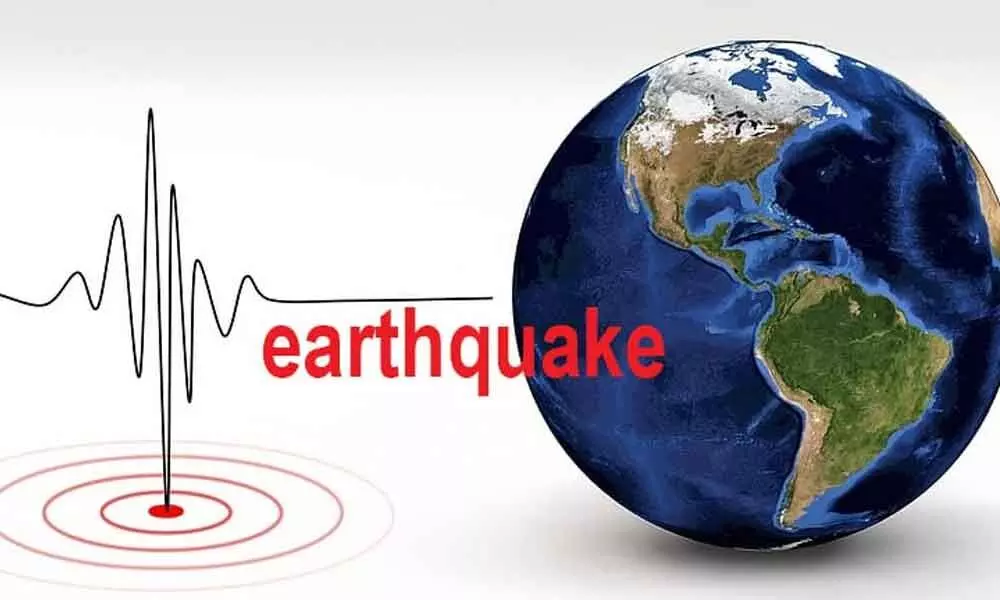



**ABOUT THE DATASET**

The dataset in this project contains records of earthquake occurrences in and around the Asian region from 2013 to 2023. It was downloaded from GitHub and contains 9,749 rows and 22 columns.

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**LOAD THE DATASET**

In [ ]:
data=pd.read_csv("/content/Earthquake_Project.csv")
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-25T07:25:02.082Z,44.8695,52.4433,10.388,4.5,mb,49.0,52.0,3.670,0.87,...,2023-04-25T12:11:17.078Z,"84 km NNE of Shetpe, Kazakhstan",earthquake,8.31,5.457,0.079,48.0,reviewed,us,us
1,2023-04-24T14:13:04.988Z,43.3327,83.7836,10.000,4.4,mb,40.0,85.0,3.136,1.05,...,2023-04-24T16:19:53.040Z,"44 km ESE of Xinyuan, China",earthquake,7.48,1.700,0.104,27.0,reviewed,us,us
2,2023-04-24T00:21:45.048Z,36.4780,70.9118,120.173,4.0,mb,29.0,84.0,2.462,0.78,...,2023-04-25T03:35:22.040Z,"43 km S of Jurm, Afghanistan",earthquake,6.09,8.250,0.173,9.0,reviewed,us,us
3,2023-04-23T18:10:43.106Z,37.4855,70.0997,9.686,4.4,mb,39.0,122.0,1.454,0.58,...,2023-04-23T19:36:25.040Z,"37 km ESE of Chubek, Tajikistan",earthquake,6.87,6.011,0.108,25.0,reviewed,us,us
4,2023-04-23T16:27:53.084Z,30.3602,70.9070,39.643,4.8,mb,16.0,163.0,4.456,0.56,...,2023-04-24T11:22:14.717Z,"13 km SSW of Kot Addu, Pakistan",earthquake,15.53,10.959,0.109,26.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9744,2013-04-19T20:22:33.290Z,32.8010,51.8110,8.000,4.3,mb,52.0,100.0,NaN,NaN,...,2022-08-06T15:06:09.188Z,"10 km E of Dowlat?b?d, Iran",earthquake,NaN,NaN,NaN,31.0,reviewed,teh,us
9745,2013-04-19T18:32:57.700Z,28.4720,51.5970,19.000,4.4,mb,55.0,100.0,NaN,NaN,...,2014-11-07T01:50:36.002Z,"92 km SE of Bushehr, Iran",earthquake,NaN,NaN,NaN,42.0,reviewed,teh,us
9746,2013-04-19T14:46:45.000Z,34.6500,73.1280,25.500,4.4,mb,42.0,59.0,NaN,1.01,...,2014-11-07T01:50:35.916Z,"10 km ESE of Battagram, Pakistan",earthquake,NaN,5.300,NaN,13.0,reviewed,us,us
9747,2013-04-19T08:32:24.880Z,36.5830,70.8020,188.600,4.1,mb,17.0,116.0,NaN,0.54,...,2014-11-07T01:50:35.840Z,"31 km S of Jurm, Afghanistan",earthquake,NaN,30.200,NaN,1.0,reviewed,us,us


## **EXPLORATORY DATA ANALYSIS**

**SHAPE OF THE DATASET**

In [ ]:
data.shape

(9749, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9749 entries, 0 to 9748
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9749 non-null   object 
 1   latitude         9749 non-null   float64
 2   longitude        9749 non-null   float64
 3   depth            9749 non-null   float64
 4   mag              9749 non-null   float64
 5   magType          9749 non-null   object 
 6   nst              1370 non-null   float64
 7   gap              9407 non-null   float64
 8   dmin             9045 non-null   float64
 9   rms              9648 non-null   float64
 10  net              9749 non-null   object 
 11  id               9749 non-null   object 
 12  updated          9749 non-null   object 
 13  place            9687 non-null   object 
 14  type             9749 non-null   object 
 15  horizontalError  8287 non-null   float64
 16  depthError       9582 non-null   float64
 17  magError      

In [ ]:
data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

### **Features in dataset**

●	time - Time when the event occurred. It is reported in milliseconds

●	latitude - Decimal degrees latitude. Negative values for southern latitudes

●	longitude - Decimal degrees longitude.Negative values for western longitudes

●	depth - Depth of the event in kilometers

●	mag - Magnitude of event occurred

●	magType - The method or algorithm used to calculate the preferred magnitude

●	nst - The total number of seismic stations used to determine earthquake  location

●	gap - The largest azimuthal gap between azimuthally adjacent stations (in degrees)

●	dmin - Horizontal distance from the epicenter to the nearest station (in degrees)

●	rms - The root-mean-square (RMS) travel time residual, in sec, using all weights

●	net - The ID of a data source contributor for an event occurred

●	id - A unique identifier for the event

●	updated - timestamp or date indecating when the earthquake informations was last updated or revised

●	place - named geographic region near to the event

●	type - Type of seismic event

●	locationSource - The network that originally authored the reported location of this event

●	magSource - Network that originally authored the reported magnitude for this event

●	horizontalError - Uncertainty of reported location of the event in kilometers

●	depthError - Uncertainty of reported depth of the event in Kms

●	magError - Uncertainty of reported magnitude of the event

●	magNst - The total number of seismic stations to calculate the magnitude of the earthquake

●	status - Indicates whether the event has been reviewed by a human.




**Datatype of the columns**

In [ ]:
data.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

### **Properties of rows and columns**

Categorical columns include: time, magType, net, id ,updated, place, type, status, locationSource ,magSource

Numerical columns include: latitude, longitude, depth, mag ,nst, gap, dmin, rms ,horizontalError, depthError, magError, magNst

In [ ]:
data[data.duplicated()]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource


**MISSING VALUES**

In [ ]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8379
gap                 342
dmin                704
rms                 101
net                   0
id                    0
updated               0
place                62
type                  0
horizontalError    1462
depthError          167
magError            435
magNst              552
status                0
locationSource        0
magSource             0
dtype: int64

**MISSING COLUMNS LIST**

In [ ]:
[i for i in data.columns if data[i].isnull().sum()>0]

['nst',
 'gap',
 'dmin',
 'rms',
 'place',
 'horizontalError',
 'depthError',
 'magError',
 'magNst']

**MISSING PERCENTAGE**

In [ ]:
100*data.isnull().sum()/data.shape[0]

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magType             0.000000
nst                85.947277
gap                 3.508052
dmin                7.221253
rms                 1.036004
net                 0.000000
id                  0.000000
updated             0.000000
place               0.635963
type                0.000000
horizontalError    14.996410
depthError          1.712996
magError            4.461996
magNst              5.662119
status              0.000000
locationSource      0.000000
magSource           0.000000
dtype: float64

In [ ]:
data.nunique()

time               9749
latitude           9302
longitude          9514
depth              4169
mag                  47
magType              10
nst                 180
gap                 380
dmin               5051
rms                 168
net                   2
id                 9749
updated            6881
place              7480
type                  1
horizontalError     590
depthError          680
magError            336
magNst              265
status                1
locationSource        7
magSource             6
dtype: int64

In [ ]:
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9749.000000,9749.000000,9749.000000,9749.000000,1370.000000,9407.000000,9045.000000,9648.000000,8287.000000,9582.000000,9314.000000,9197.000000
mean,32.524655,76.039008,49.132742,4.421865,55.846715,87.688774,3.102512,0.825066,7.192738,4.289706,0.129327,36.043166
std,6.123895,16.361299,63.531274,0.375508,47.881686,40.268004,2.485894,0.260522,2.180915,3.000431,0.070151,42.976510
min,14.609500,46.407900,1.500000,2.700000,6.000000,9.000000,0.001000,0.130000,1.500000,0.000000,0.000000,1.000000
25%,27.832200,68.354900,10.000000,4.200000,27.000000,61.000000,1.087000,0.640000,5.800000,1.900000,0.080000,11.000000
50%,33.118500,72.424500,10.530000,4.400000,41.000000,80.000000,2.471000,0.800000,7.100000,2.900000,0.115000,21.000000
75%,36.979600,89.662200,61.780000,4.600000,67.000000,108.000000,4.456000,0.980000,8.400000,6.200000,0.159000,42.000000
max,48.387600,115.207300,400.570000,7.800000,586.000000,306.000000,23.330000,2.360000,28.900000,30.200000,0.540000,578.000000


### **DATA VISUALIZATION**

**UNIVARIATE ANALYSIS**

**DISTRIBUTION PLOTS : Plotted distribution graphs for features for identifying if the distribution is normal or has left/right skewdness.
Features considered are depth, mag , magNst, horizontalError, depthError, nst, gap, dmin, rms and magError.**

<Axes: xlabel='magNst', ylabel='Density'>

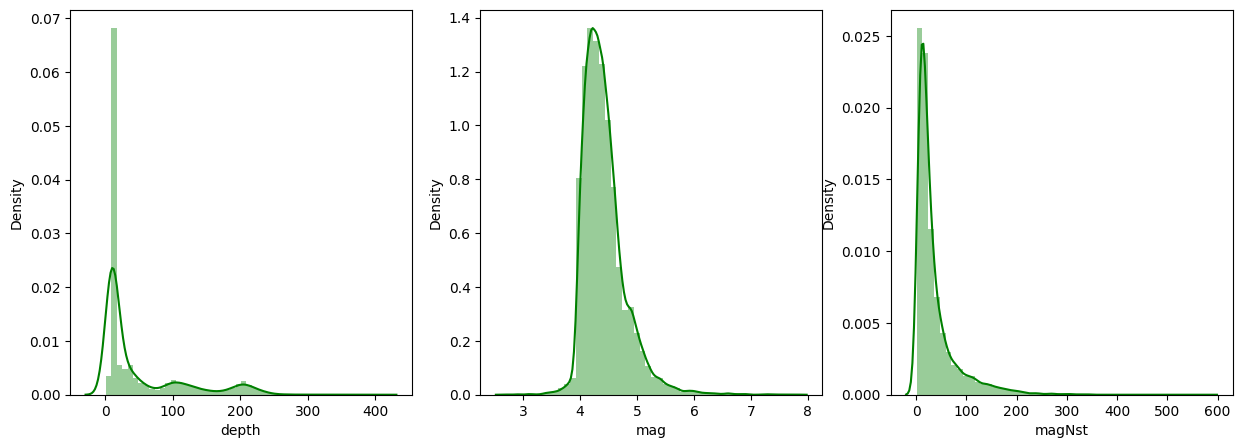

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.distplot(data.depth, ax=axs[0],color='g')
sns.distplot(data.mag,ax=axs[1],color='g')
sns.distplot( data.magNst, ax=axs[2],color='g')

<Axes: xlabel='nst', ylabel='Density'>

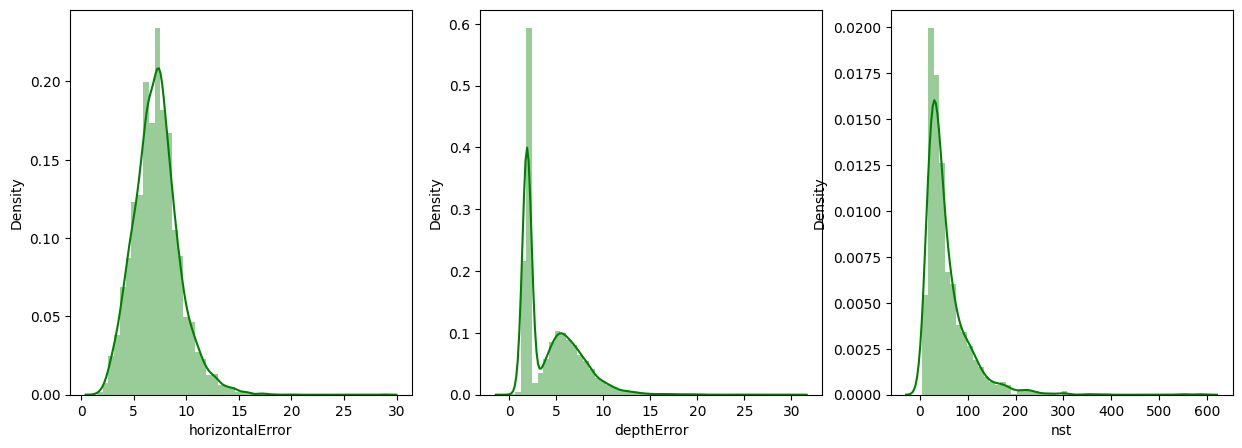

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.distplot(data.horizontalError, ax=axs[0],color='g')
sns.distplot(data.depthError,ax=axs[1],color='g')
sns.distplot( data.nst, ax=axs[2],color='g')

<Axes: xlabel='dmin', ylabel='Density'>

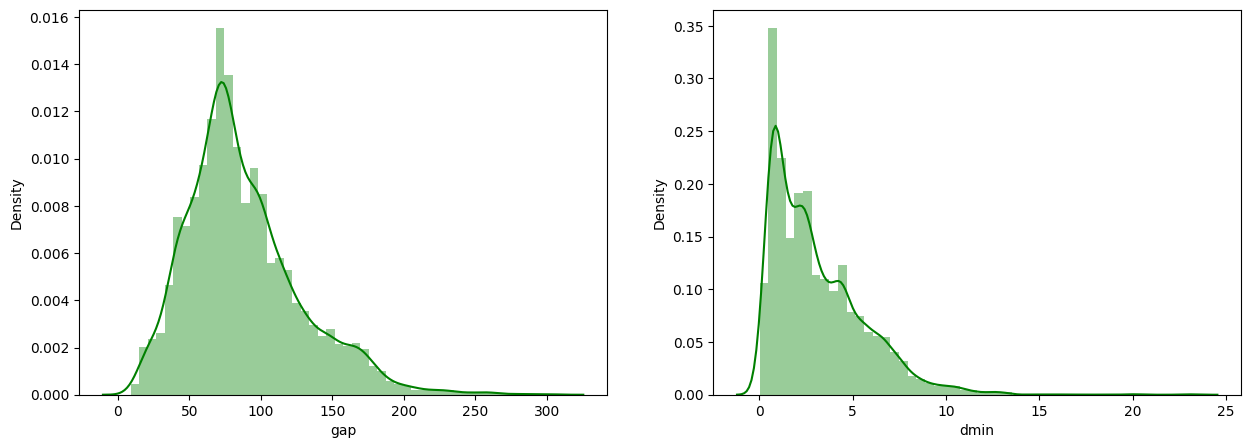

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.distplot(data.gap, ax=axs[0],color='g')
sns.distplot(data.dmin,ax=axs[1],color='g')

<Axes: xlabel='magError', ylabel='Density'>

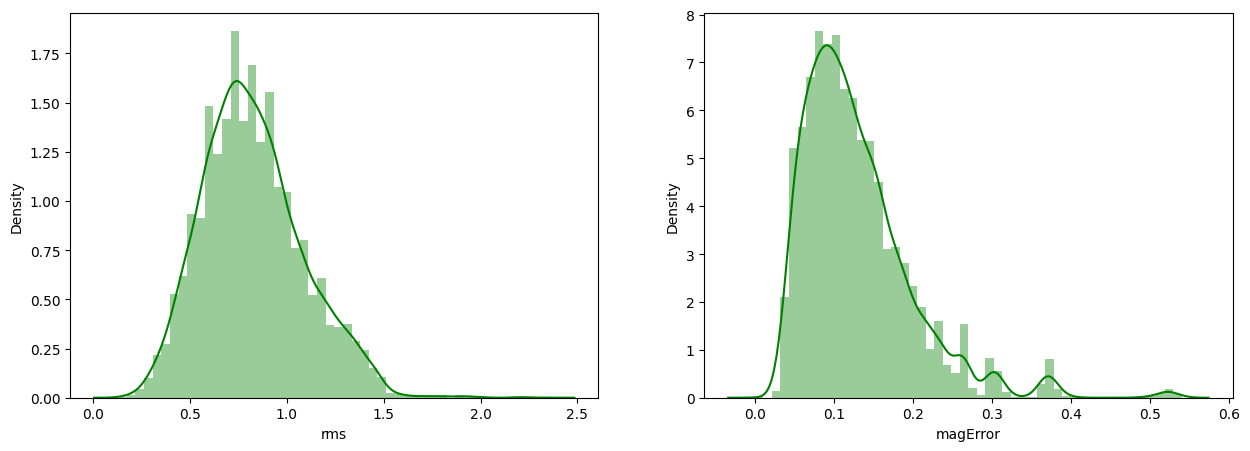

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(15, 5))
sns.distplot(data.rms, ax=axs[0],color='g')
sns.distplot(data.magError,ax=axs[1],color='g')

**PLOTTING BOXPLOTS TO DETECT OUTLIERS**

Text(0.5, 1.0, 'mag')

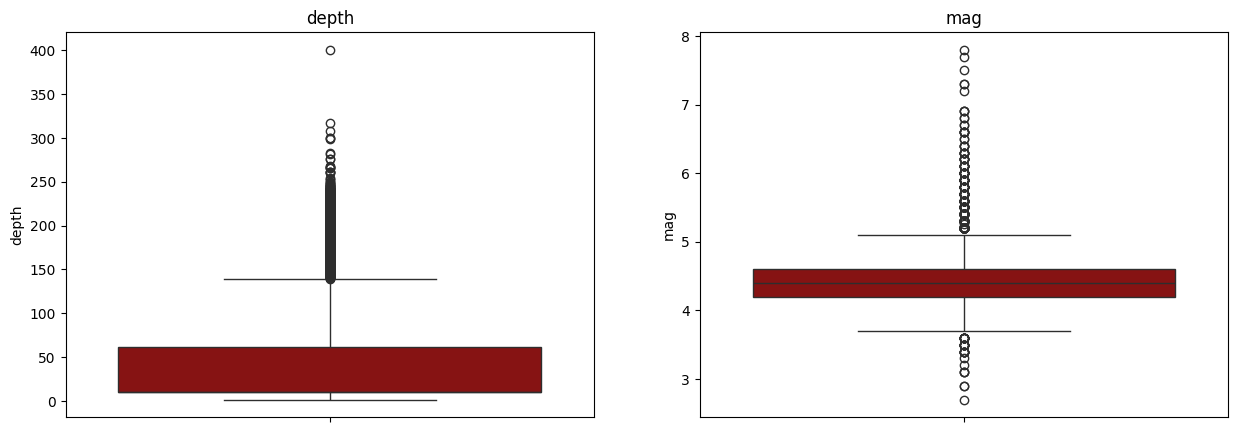

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(data.depth,ax=axs[0],color='#990000').set_title('depth')
sns.boxplot(data.mag,ax=axs[1],color='#990000').set_title('mag')

Text(0.5, 1.0, 'magError')

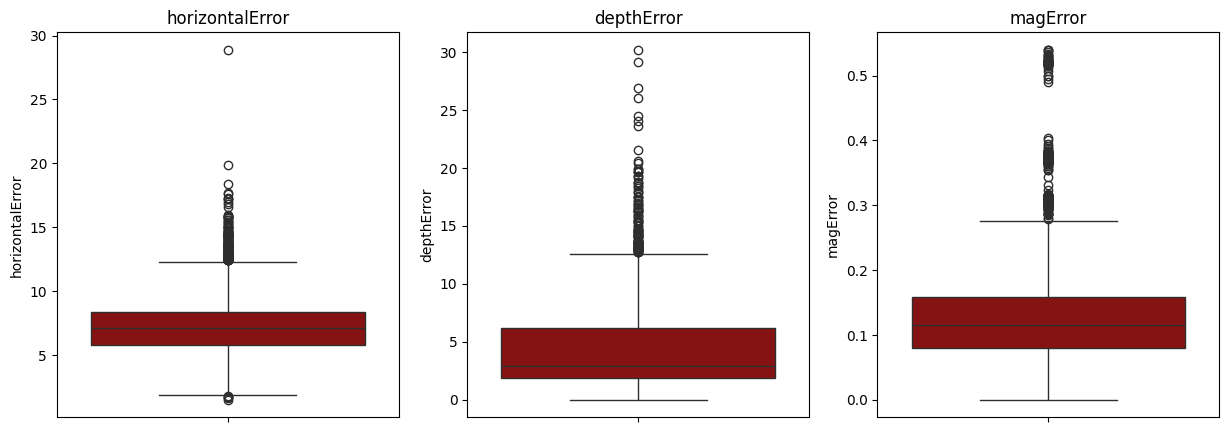

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.boxplot(data.horizontalError,ax=axs[0],color='#990000').set_title('horizontalError')
sns.boxplot(data.depthError,ax=axs[1],color='#990000').set_title('depthError')
sns.boxplot(data.magError,ax=axs[2],color='#990000').set_title('magError')

Text(0.5, 1.0, 'magNst')

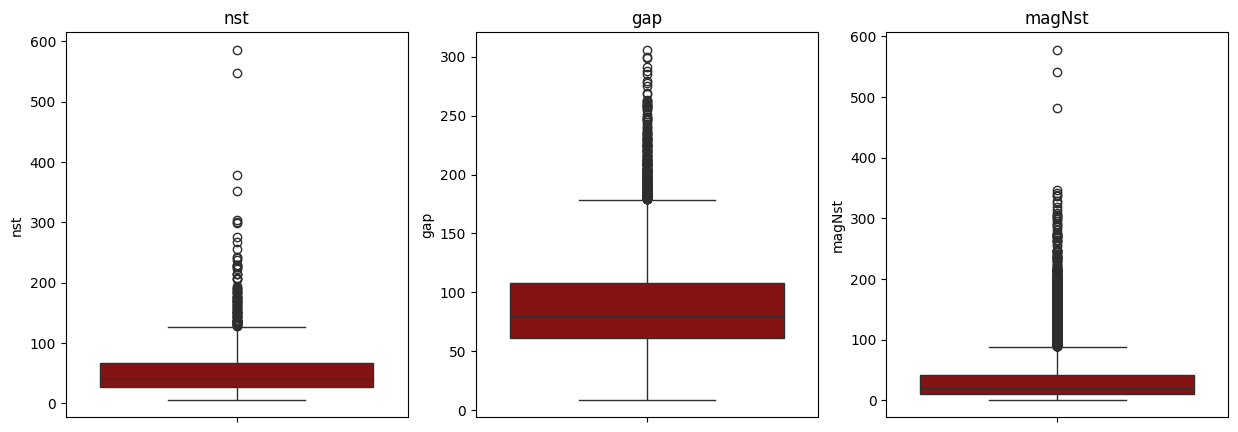

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.boxplot(data.nst,ax=axs[0],color='#990000').set_title('nst')
sns.boxplot(data.gap,ax=axs[1],color='#990000').set_title('gap')
sns.boxplot(data.magNst,ax=axs[2],color='#990000').set_title('magNst')

Text(0.5, 1.0, 'rms')

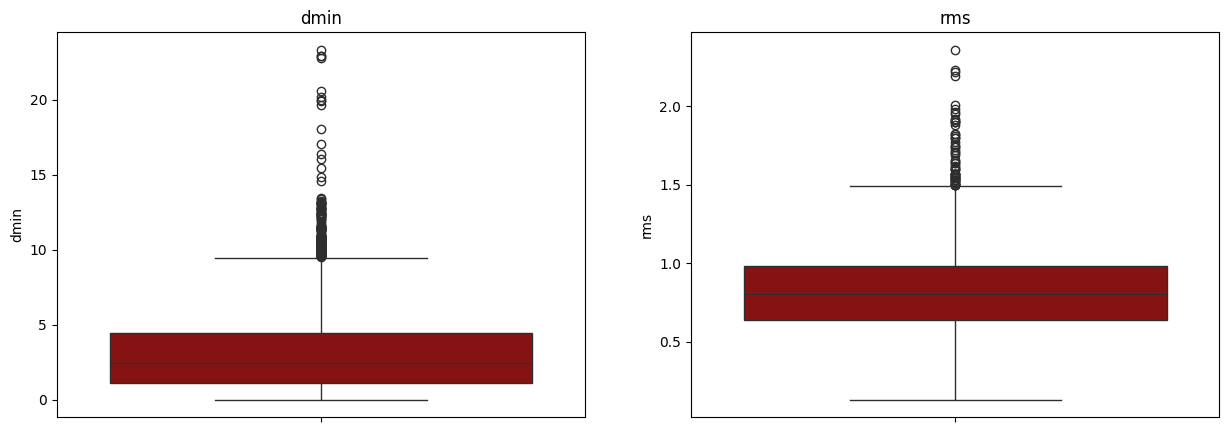

In [ ]:
fig, axs =plt.subplots(ncols=2,figsize=(15,5))
sns.boxplot(data.dmin,ax=axs[0],color='#990000').set_title('dmin')
sns.boxplot(data.rms,ax=axs[1],color='#990000').set_title('rms')

**BIVARIATE ANALYSIS**

**Plotting Barplot and analysing mag and nst**

<Axes: xlabel='mag', ylabel='nst'>

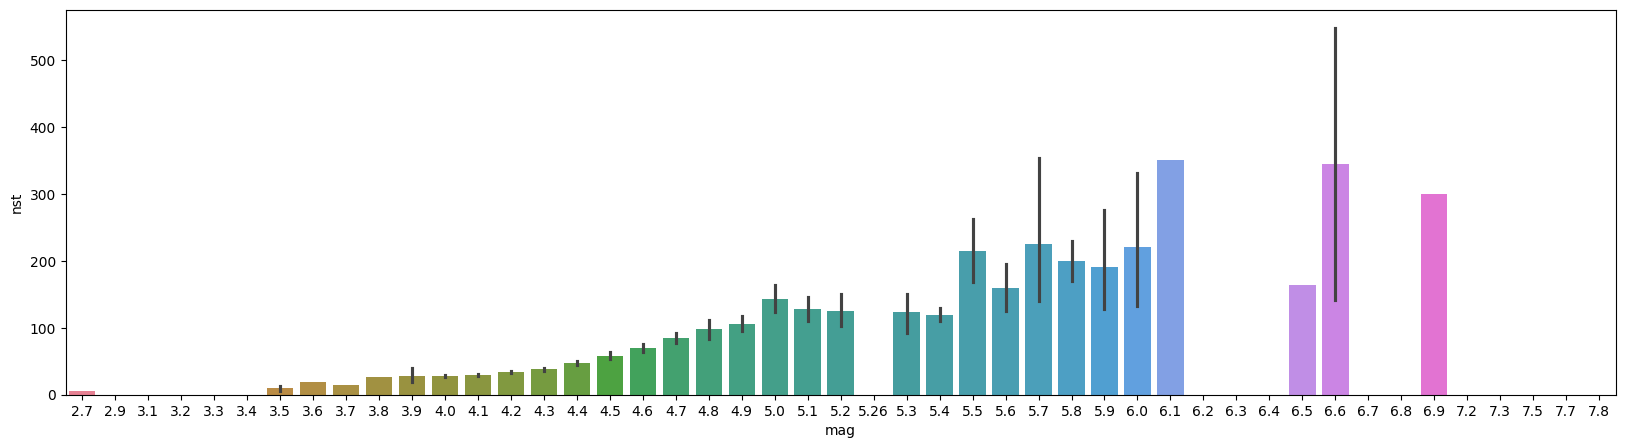

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='mag',y='nst',data=data,palette='husl')

**OBSERVATION : The magnitude is increasing with increase in number of sesimic stations(nst).Shows a positive correlation**

**Plotting Barplot and analysing mag and gap**

<Axes: xlabel='mag', ylabel='gap'>

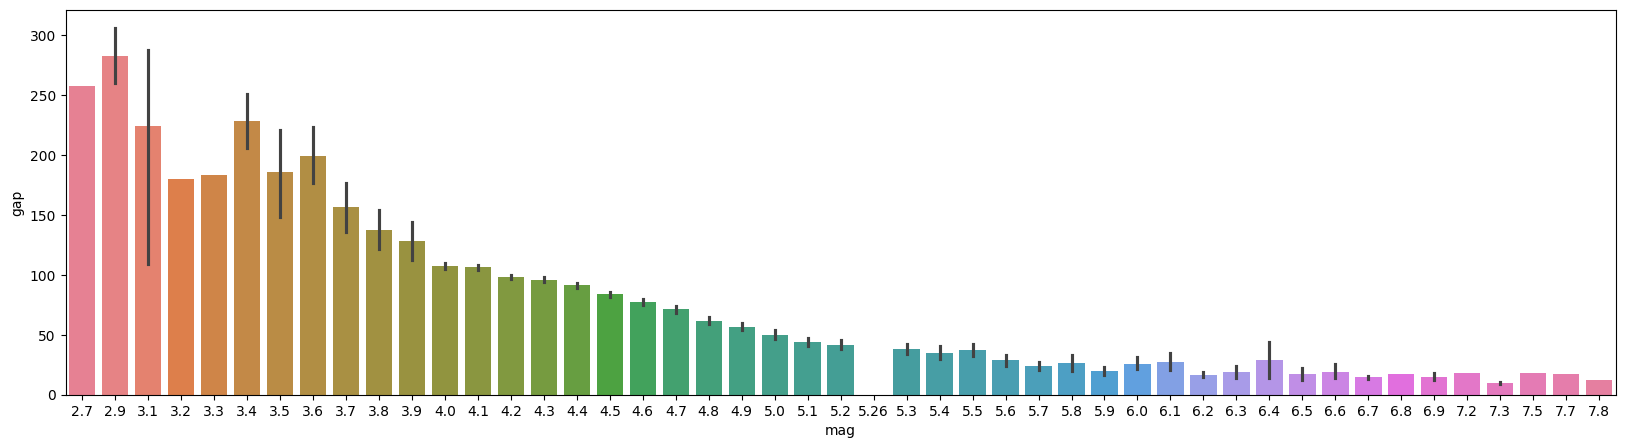

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='mag',y='gap',data=data,palette='husl')

**OBSERVATION : As there is increase in gap between adjacent stations(gap), there is decrease in magnitude of the earthquake.Shows a negative correlation**

**Plotting Barplot and analysing mag and magNst**

<Axes: xlabel='mag', ylabel='magNst'>

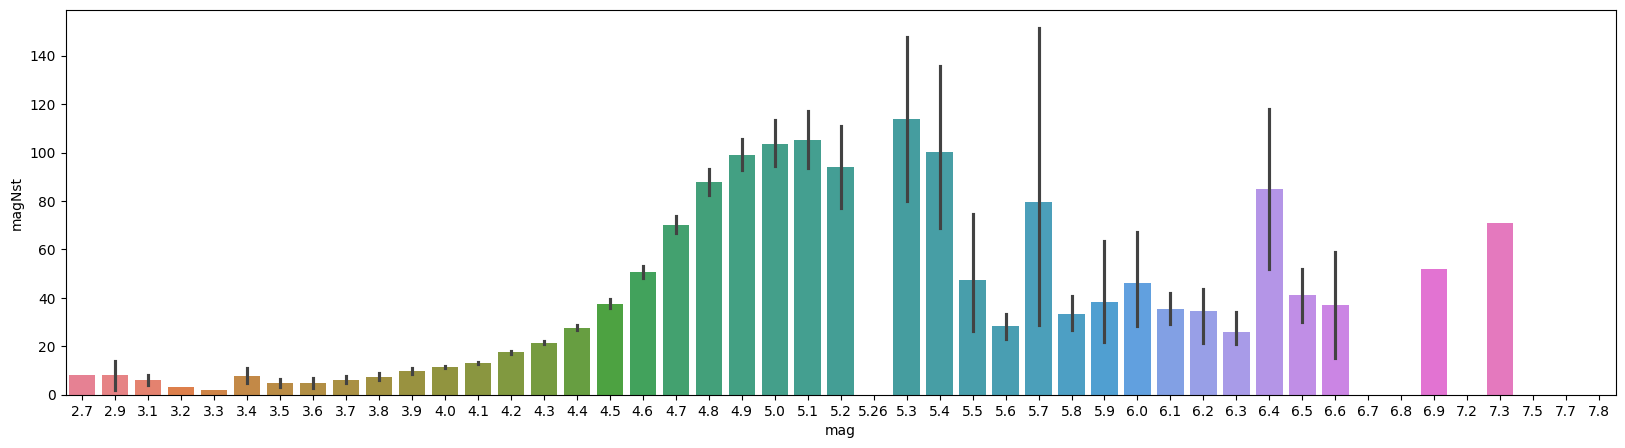

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='mag',y='magNst',data=data,palette='husl')

 **OBSERVATION : Shows a slight positive relationship saying increased stations could actually be required in detecting higher magnitude**

**Plotting Barplot and analysing mag and magError**

<Axes: xlabel='mag', ylabel='magError'>

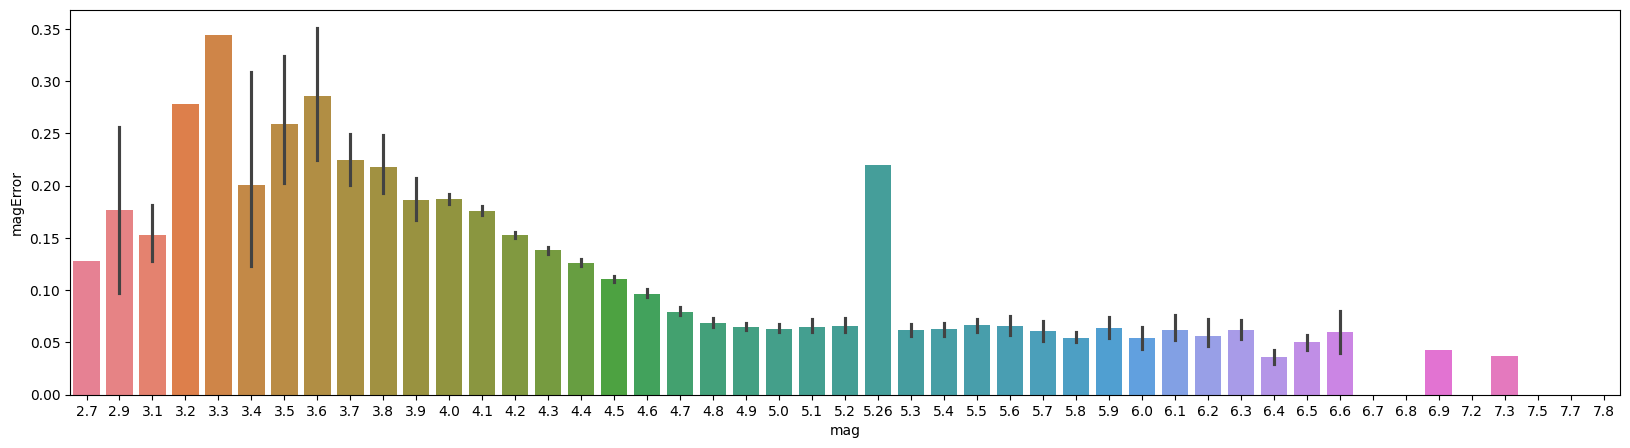

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='mag',y='magError',data=data,palette='husl')

**OBSERVATION : Displays that increased magnitude gives decreased magnitude Errors**

**Scatter plot of nst and magError**

<Axes: xlabel='nst', ylabel='magError'>

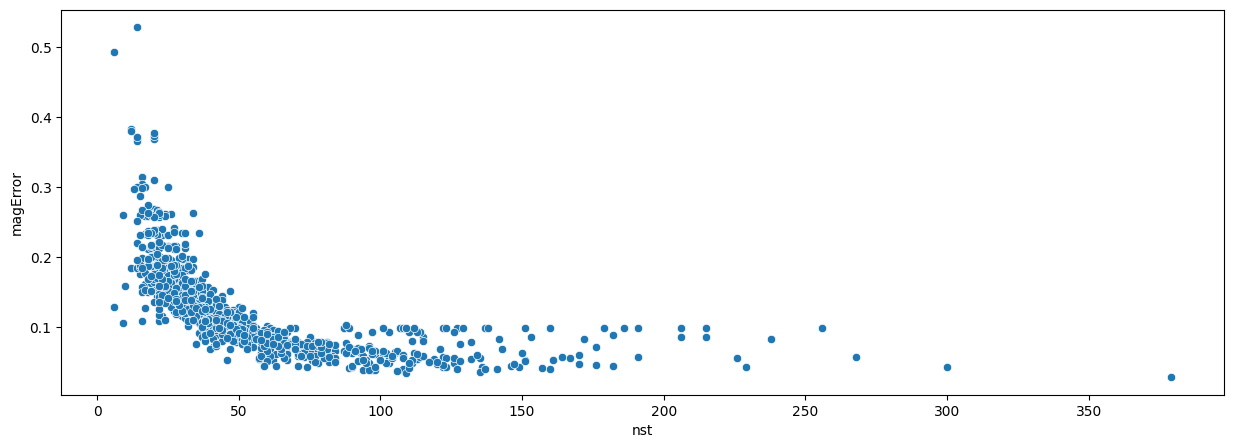

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='nst',y='magError',data=data)

**OBSERVATION : Higher the number of stations, lesser is the magnitude error**

**Bar plot of magType and mag**

<Axes: xlabel='magType', ylabel='mag'>

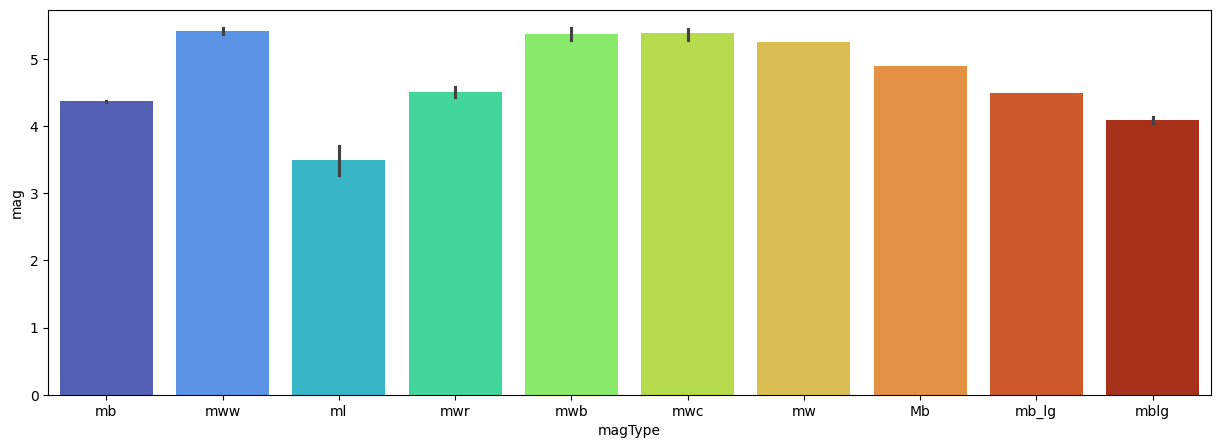

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='magType',y='mag',data=data,palette='turbo')

**Scatter plot of magError and magNst**

<Axes: xlabel='magError', ylabel='magNst'>

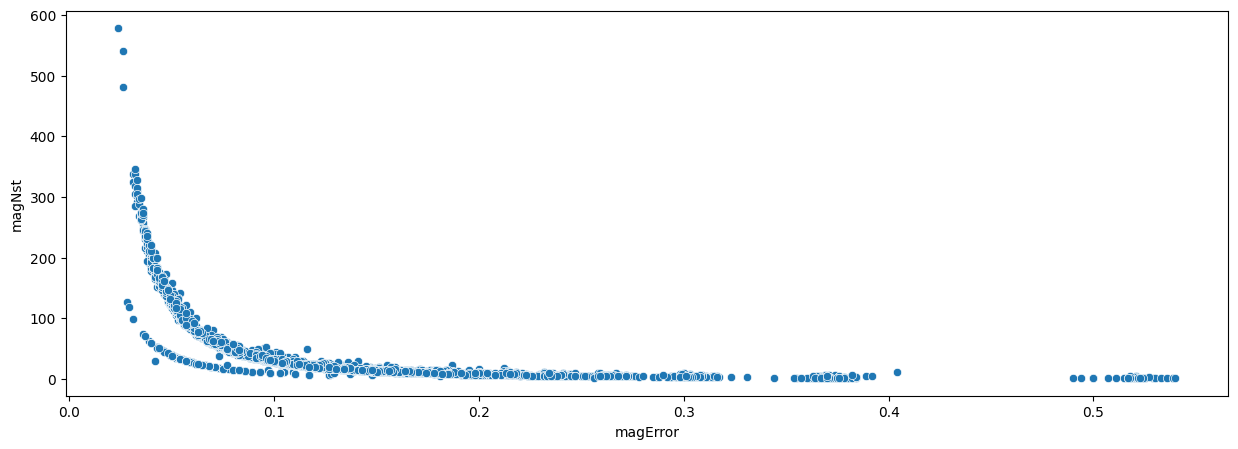

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="magError",y="magNst",data=data,palette='plasma')

**Observation : Significant drop in the magnitude error when the stations for calculating magnitude of the earthquake are increased**

**Scatter plot of depth and dmin**

<Axes: xlabel='depth', ylabel='dmin'>

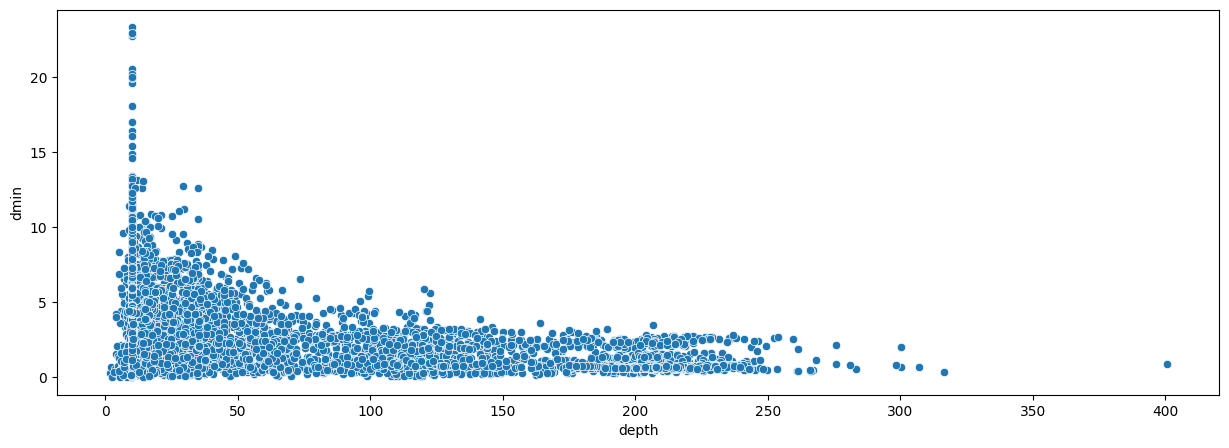

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="depth",y="dmin",data=data)

**Observation : From the plot, it shows smaller dmin value could be reliable for calculating the increased depth of the earthquake**

**Changing the datatype of time(object) to datetime**

In [ ]:
data['time']=pd.to_datetime(data['time'])

In [ ]:
data['time'].head()

0   2023-04-25 07:25:02.082000+00:00
1   2023-04-24 14:13:04.988000+00:00
2   2023-04-24 00:21:45.048000+00:00
3   2023-04-23 18:10:43.106000+00:00
4   2023-04-23 16:27:53.084000+00:00
Name: time, dtype: datetime64[ns, UTC]

In [ ]:
data['year'] = data['time'].dt.year

In [ ]:
data['year'].head()

0    2023
1    2023
2    2023
3    2023
4    2023
Name: year, dtype: int32

In [ ]:
years = data['year'].value_counts().index
years

Index([2015, 2014, 2021, 2022, 2020, 2016, 2018, 2017, 2019, 2013, 2023], dtype='int32', name='year')

 **Pie plot of year wise highest number of earthquakes**

([<matplotlib.patches.Wedge at 0x78aadd4de1d0>,
 [Text(1.0216910564404802, 0.407611806980043, '2015'),
  Text(0.5047985058612539, 0.9773323224370746, '2014'),
  Text(-0.20770699365828404, 1.080211925867067, '2021'),
  Text(-0.8214242251119876, 0.7316161851675854, '2022'),
  Text(-1.0945863886825786, 0.10899833811040921, '2020'),
  Text(-0.9623689029434285, -0.5327720850865425, '2016'),
  Text(-0.5139096420077363, -0.972572300577947, '2018'),
  Text(0.06677701880340917, -1.097971233575693, '2017'),
  Text(0.6127657522487626, -0.913519640112356, '2019'),
  Text(0.9900969878849712, -0.47927857721904, '2013'),
  Text(1.0952332325047134, -0.10229450824592909, '2023')],
 [Text(0.5572860307857164, 0.22233371289820525, '12.1%'),
  Text(0.2753446395606839, 0.5330903576929497, '10.7%'),
  Text(-0.11329472381360947, 0.5892065050184001, '10.6%'),
  Text(-0.4480495773338114, 0.39906337372777384, '10.2%'),
  Text(-0.5970471210995884, 0.059453638969314104, '9.8%'),
  Text(-0.5249284925145973, -0.2906

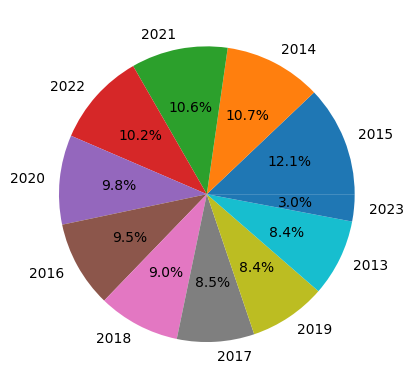

In [ ]:
year_count = data['year'].value_counts()
plt.pie(year_count,labels=year_count.index,autopct='%1.1f%%')

**OBSERVATION : Most Earthquakes happened in the year 2015 and 2023 contains least number of Earthquakes**

**Plot of number of Earthquake in each month**

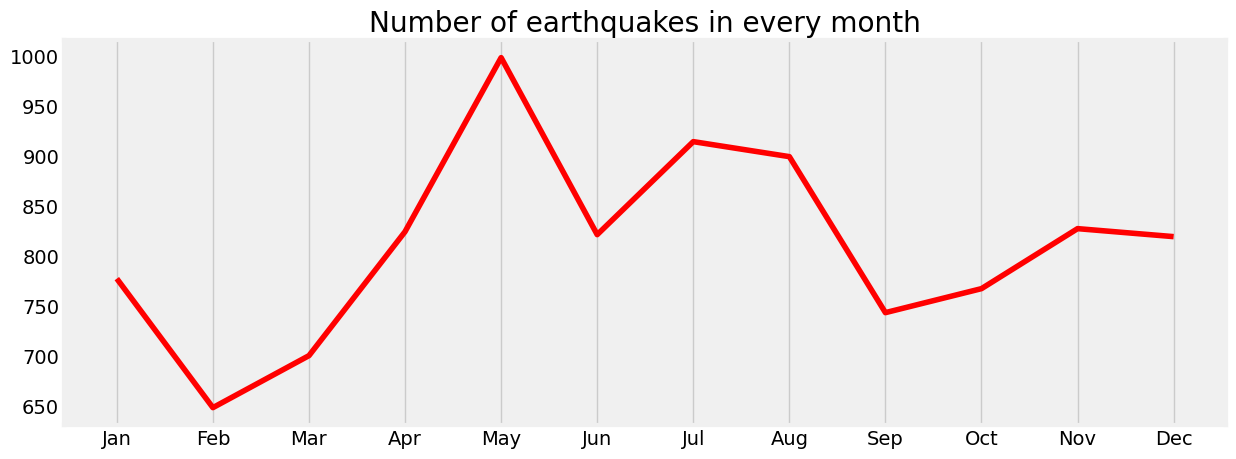

In [ ]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
data_month=data['time'].dt.month.value_counts().sort_index()
plt.plot(data_month.index,data_month,color='red')
plt.xticks(ticks=range(1,13),labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Number of earthquakes in every month')
plt.grid(visible=False,axis='y')
plt.show()

**OBSERVATION : Number of earthquake occurrence is large in the month of May**

In [ ]:
top_ten_affected_places=data[data['place'].notnull()].nlargest(10,'mag')
top_ten_affected_places[['place','mag']]

,place,mag
7666,"67 km NNE of Bharatpur, Nepal",7.8
9227,"113 km NW of Bela, Pakistan",7.7
6932,"Hindu Kush region, Afghanistan",7.5
1973,"Southern Qinghai, China",7.3
7474,Nepal,7.3
6789,"104 km W of Murghob, Tajikistan",7.2
159,"65 km WSW of Murghob, Tajikistan",6.9
6469,"76 km SE of Mawlaik, Myanmar",6.9
8815,"272 km ESE of Hotan, China",6.9
6080,"26 km W of Chauk, Myanmar",6.8


Places with top ten Earthquakes with highest magnitude recorded, Earthquake with highest magnitude (with 7.8) has been recorded in 67 km NNE of Bharatpur, Nepal.

**OBSERVATION :  Top ten places with Earthquakes and corresponding magnitudes recorded**

**Plot of Places with top ten Earthquakes**

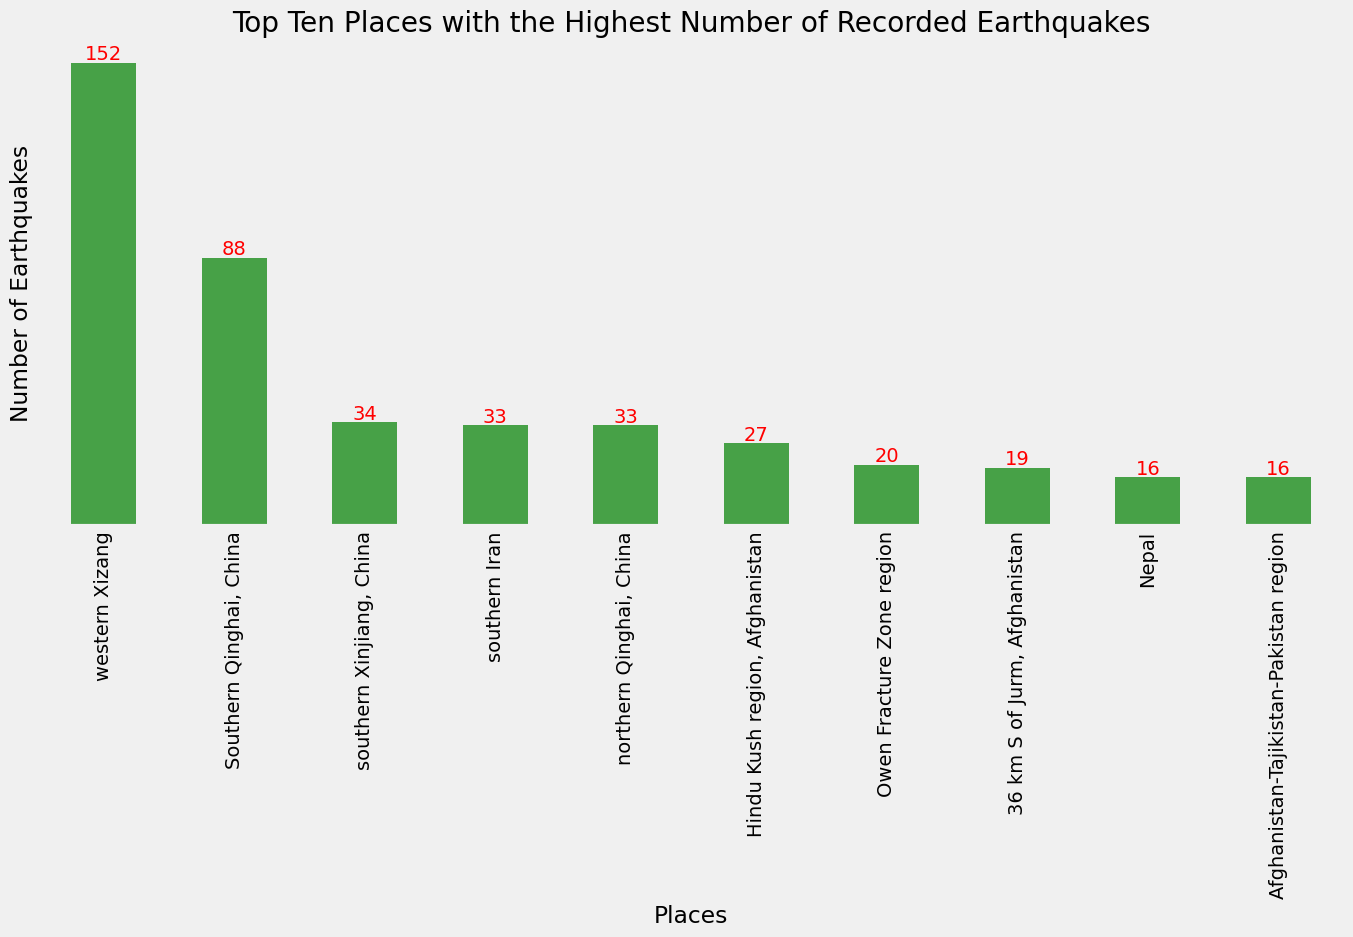

In [ ]:
# Calculate the count of earthquakes for the top ten places
top_ten_place_count = data.loc[data['place'].notnull(),'place'].value_counts().head(10)
# Increase figure size
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Plot a bar chart for the top ten places
top_ten_place_count.plot(kind='bar', color='green', alpha=0.7)

# Add titles and labels
plt.title('Top Ten Places with the Highest Number of Recorded Earthquakes')
plt.xlabel('Places')
plt.ylabel('Number of Earthquakes')
plt.tick_params(labelleft=False, left=False)
plt.grid(visible=False)

# Add count labels on top of bars
for (i,count) in enumerate(top_ten_place_count):
    plt.text(i, count + 1, count, color='red', ha='center')

# Display the plot
plt.show()


**OBSERVATION : Shows top ten places with highest Earthquakes**

**Count of places with higher number of Earthquakes**

In [ ]:
place_count = data['place'].value_counts()
place_count

place
western Xizang                       152
Southern Qinghai, China               88
southern Xinjiang, China              34
southern Iran                         33
northern Qinghai, China               33
                                    ... 
80 km N of Bandar-e Lengeh, Iran       1
59 km NE of Hashtr?d, Iran             1
35 km ESE of Farkh?r, Afghanistan      1
57 km NE of Hashtr?d, Iran             1
40 km W of Gyalshing, India            1
Name: count, Length: 7480, dtype: int64

**OBSERVATION : Western Xizang have the highest number of Earthquakes**



**MULTIVARIATE ANALYSIS**

<Axes: xlabel='latitude', ylabel='longitude'>

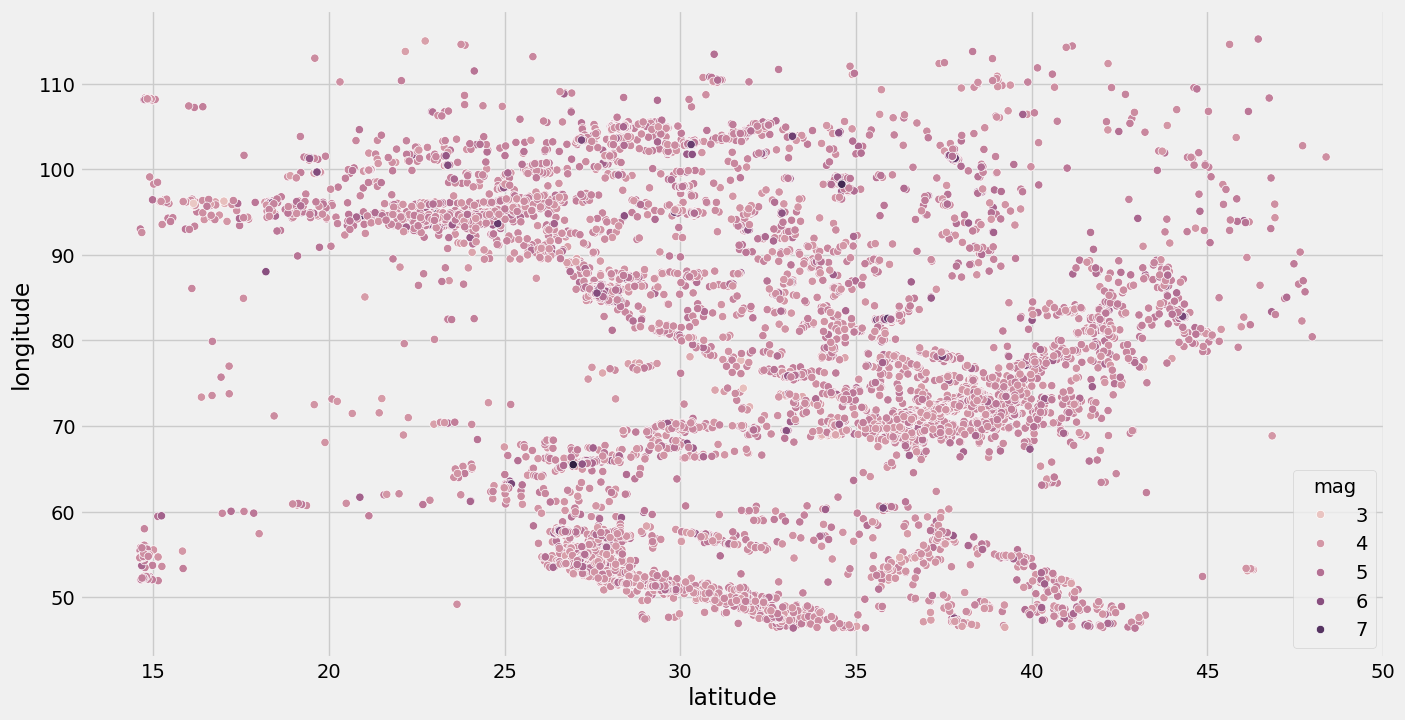

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',hue='mag',data=data,alpha=1)

**OBSERVATION : Plotted Latitude and Longitude with the intensity of magnitude of Earthquake**

### **VISUALIZING THE EARTHQUAKE SITE OF ALL THE SAMPLES**

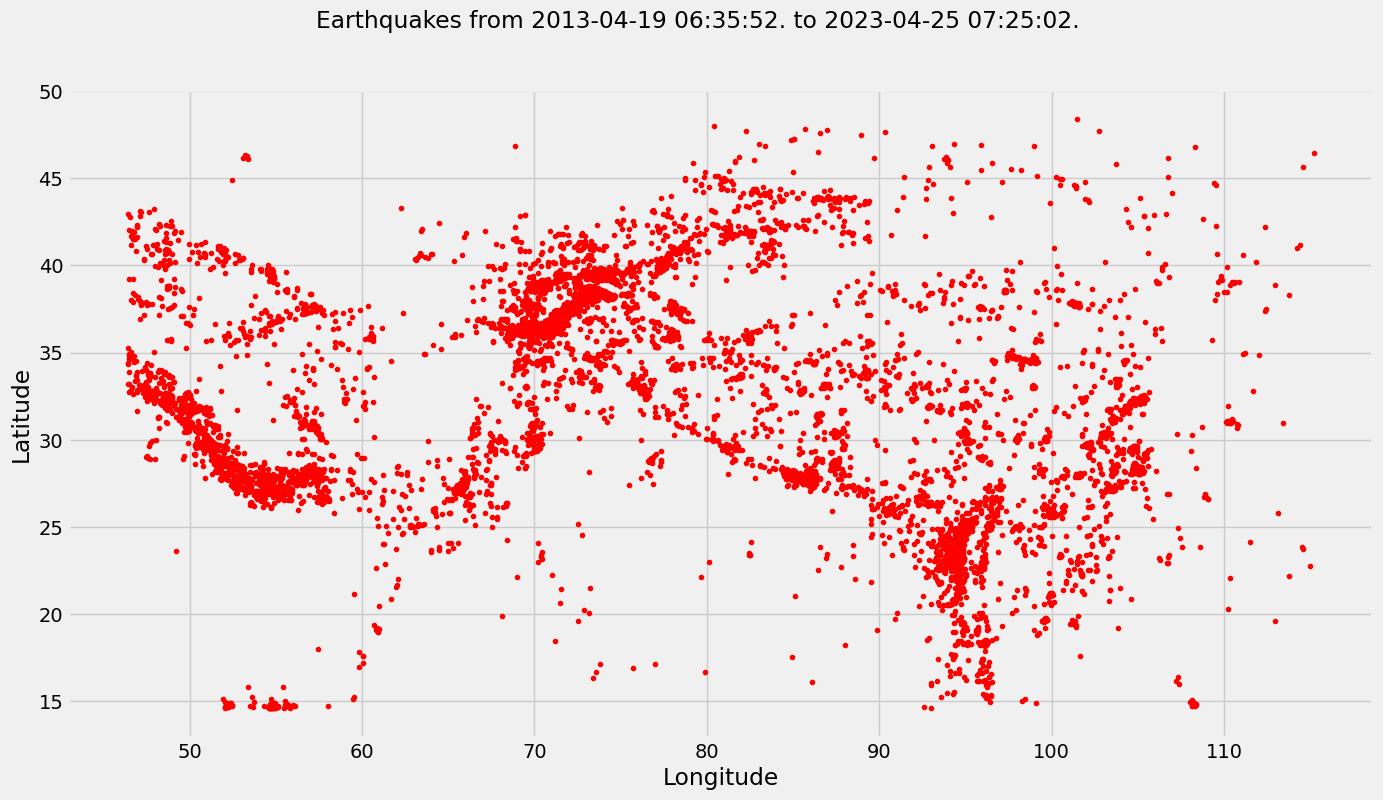

In [ ]:
rounding_factor = 10
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(np.round(data['longitude'],rounding_factor),
np.round(data['latitude'],rounding_factor),linestyle='none', marker='.',color='red')
plt.suptitle('Earthquakes from ' + str(np.min(data['time']))[:20] + ' to ' + str(np.max(data['time']))[:20])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# **DATA PRE-PROCESSING**

Data preprocessing is the concept of changing the raw data into a clean data set. The dataset is preprocessed in-order to check missing values, noisy data, and other inconsistencies before executing it to the algorithm. The reason we  need data preprocessing is that it improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable. Overall It makes data consistent

In [ ]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8379
gap                 342
dmin                704
rms                 101
net                   0
id                    0
updated               0
place                62
type                  0
horizontalError    1462
depthError          167
magError            435
magNst              552
status                0
locationSource        0
magSource             0
year                  0
dtype: int64

**For Handling missing values in the Place column**

 Missing values present in the place columns are replaced using reverse geocoding. There are 62 rows that have missing this column . Reverse geocoding is the process to convert the latitude and longitude coordinates to a readable address. We already have latitude and longitude details thereby we can get addresses of place columns using that.

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_app")
def missing_place(data):
  for index, row in data.iterrows():
    if pd.isnull(row['place']):
      lat = row['latitude']
      lon = row['longitude']
      location = geolocator.reverse((lat,lon),exactly_one=True,language="english")
      if location is not None:
        address = location.raw['address']
        city = address.get('city')
        state = address.get('state')
        country = address.get('country')
        if city and state and country:
          place = "f{city}, {state}, {country}"
        elif city and state:
          place ="f{city}, {state}"
        elif state and country:
          place ="f{state}, {country}"
        elif city and country:
          place = "f{city}, {country}"
        elif city:
          place= city
        elif state:
          place = state
        else:
          place = country
      else:
        place = 'Unknown'
      data.at[index,'place'] =place
  return data




In [ ]:
# Fill in missing place values using the missing_place function
data_filled = missing_place(data)
data_filled

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year
0,2023-04-25 07:25:02.082000+00:00,44.8695,52.4433,10.388,4.5,mb,49.0,52.0,3.670,0.87,...,"84 km NNE of Shetpe, Kazakhstan",earthquake,8.31,5.457,0.079,48.0,reviewed,us,us,2023
1,2023-04-24 14:13:04.988000+00:00,43.3327,83.7836,10.000,4.4,mb,40.0,85.0,3.136,1.05,...,"44 km ESE of Xinyuan, China",earthquake,7.48,1.700,0.104,27.0,reviewed,us,us,2023
2,2023-04-24 00:21:45.048000+00:00,36.4780,70.9118,120.173,4.0,mb,29.0,84.0,2.462,0.78,...,"43 km S of Jurm, Afghanistan",earthquake,6.09,8.250,0.173,9.0,reviewed,us,us,2023
3,2023-04-23 18:10:43.106000+00:00,37.4855,70.0997,9.686,4.4,mb,39.0,122.0,1.454,0.58,...,"37 km ESE of Chubek, Tajikistan",earthquake,6.87,6.011,0.108,25.0,reviewed,us,us,2023
4,2023-04-23 16:27:53.084000+00:00,30.3602,70.9070,39.643,4.8,mb,16.0,163.0,4.456,0.56,...,"13 km SSW of Kot Addu, Pakistan",earthquake,15.53,10.959,0.109,26.0,reviewed,us,us,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9744,2013-04-19 20:22:33.290000+00:00,32.8010,51.8110,8.000,4.3,mb,52.0,100.0,NaN,NaN,...,"10 km E of Dowlat?b?d, Iran",earthquake,NaN,NaN,NaN,31.0,reviewed,teh,us,2013
9745,2013-04-19 18:32:57.700000+00:00,28.4720,51.5970,19.000,4.4,mb,55.0,100.0,NaN,NaN,...,"92 km SE of Bushehr, Iran",earthquake,NaN,NaN,NaN,42.0,reviewed,teh,us,2013
9746,2013-04-19 14:46:45+00:00,34.6500,73.1280,25.500,4.4,mb,42.0,59.0,NaN,1.01,...,"10 km ESE of Battagram, Pakistan",earthquake,NaN,5.300,NaN,13.0,reviewed,us,us,2013
9747,2013-04-19 08:32:24.880000+00:00,36.5830,70.8020,188.600,4.1,mb,17.0,116.0,NaN,0.54,...,"31 km S of Jurm, Afghanistan",earthquake,NaN,30.200,NaN,1.0,reviewed,us,us,2013


In [ ]:
# Merge the filled data frame with the original data frame using the index
data_merged = pd.merge(data, data_filled[['place']], how='left', left_index=True,right_index=True)
# Replace null values in 'place' column with filled values
data_merged['place'] = data_merged['place_y'].fillna(data_merged['place_x'])
data_merged['place_y'][:20]
#Drop extra columns
data_merged.drop(['place_x', 'place_y'], axis=1, inplace=True)
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year
0,2023-04-25 07:25:02.082000+00:00,44.8695,52.4433,10.388,4.5,mb,49.0,52.0,3.670,0.87,...,"84 km NNE of Shetpe, Kazakhstan",earthquake,8.31,5.457,0.079,48.0,reviewed,us,us,2023
1,2023-04-24 14:13:04.988000+00:00,43.3327,83.7836,10.000,4.4,mb,40.0,85.0,3.136,1.05,...,"44 km ESE of Xinyuan, China",earthquake,7.48,1.700,0.104,27.0,reviewed,us,us,2023
2,2023-04-24 00:21:45.048000+00:00,36.4780,70.9118,120.173,4.0,mb,29.0,84.0,2.462,0.78,...,"43 km S of Jurm, Afghanistan",earthquake,6.09,8.250,0.173,9.0,reviewed,us,us,2023
3,2023-04-23 18:10:43.106000+00:00,37.4855,70.0997,9.686,4.4,mb,39.0,122.0,1.454,0.58,...,"37 km ESE of Chubek, Tajikistan",earthquake,6.87,6.011,0.108,25.0,reviewed,us,us,2023
4,2023-04-23 16:27:53.084000+00:00,30.3602,70.9070,39.643,4.8,mb,16.0,163.0,4.456,0.56,...,"13 km SSW of Kot Addu, Pakistan",earthquake,15.53,10.959,0.109,26.0,reviewed,us,us,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9744,2013-04-19 20:22:33.290000+00:00,32.8010,51.8110,8.000,4.3,mb,52.0,100.0,NaN,NaN,...,"10 km E of Dowlat?b?d, Iran",earthquake,NaN,NaN,NaN,31.0,reviewed,teh,us,2013
9745,2013-04-19 18:32:57.700000+00:00,28.4720,51.5970,19.000,4.4,mb,55.0,100.0,NaN,NaN,...,"92 km SE of Bushehr, Iran",earthquake,NaN,NaN,NaN,42.0,reviewed,teh,us,2013
9746,2013-04-19 14:46:45+00:00,34.6500,73.1280,25.500,4.4,mb,42.0,59.0,NaN,1.01,...,"10 km ESE of Battagram, Pakistan",earthquake,NaN,5.300,NaN,13.0,reviewed,us,us,2013
9747,2013-04-19 08:32:24.880000+00:00,36.5830,70.8020,188.600,4.1,mb,17.0,116.0,NaN,0.54,...,"31 km S of Jurm, Afghanistan",earthquake,NaN,30.200,NaN,1.0,reviewed,us,us,2013


**KNN IMPUTATION METHOD** : Missing values in the nst, gap, dmin, horizontalError, depthError, magError and magNst is handled by KNN imputation technique. This method requires a model to be created for each input variable that has missing values. Although there are different models used to predict the missing values, the k-nearest neighbor (KNN) algorithm has proven to be generally effective, often referred to as “nearest neighbor imputation”. This works on the principle that ‘we are like our neighbors’(data points in this case). Another interesting explanation could be like a new sample is imputed by finding the samples in the training set “closest” to it and averaging these nearby points to fill in the value.

For handling missing values in depthError column using depth

In [ ]:
cols = ['depth','depthError']
X = data[cols]
X

,depth,depthError
0,10.388,5.457
1,10.000,1.700
2,120.173,8.250
3,9.686,6.011
4,39.643,10.959
...,...,...
9744,8.000,NaN
9745,19.000,NaN
9746,25.500,5.300
9747,188.600,30.200


In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
X_imputed = impute_knn.fit_transform(X)


Replace missing 'depthError' values in the original dataset with imputed values

In [ ]:
data['depthError'] = X_imputed[:,1]

In [ ]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                8379
gap                 342
dmin                704
rms                 101
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    1462
depthError            0
magError            435
magNst              552
status                0
locationSource        0
magSource             0
year                  0
dtype: int64

For handling missing values in dmin column using depth

In [ ]:
cols = ['depth','dmin']
X = data[cols]
X

,depth,dmin
0,10.388,3.670
1,10.000,3.136
2,120.173,2.462
3,9.686,1.454
4,39.643,4.456
...,...,...
9744,8.000,NaN
9745,19.000,NaN
9746,25.500,NaN
9747,188.600,NaN


In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
X_imputed=impute_knn.fit_transform(X)

Replace missing 'dmin' values in the original dataset with imputed values

In [ ]:
data['dmin'] = X_imputed[:, 1]

For handling missing values in 'magError' column using 'mag'

In [ ]:
cols = ['mag','magError']
X = data[cols]
X

,mag,magError
0,4.5,0.079
1,4.4,0.104
2,4.0,0.173
3,4.4,0.108
4,4.8,0.109
...,...,...
9744,4.3,NaN
9745,4.4,NaN
9746,4.4,NaN
9747,4.1,NaN


In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
imputed_X=impute_knn.fit_transform(X)

Replace missing 'magError' values in the original dataset with imputed values

In [ ]:
data['magError'] = imputed_X[:, 1]

For handling missing values in 'magNst' column using 'mag' and 'magError'

In [ ]:
cols = ['mag','magError','magNst']
X = data[cols]
X

,mag,magError,magNst
0,4.5,0.0790,48.0
1,4.4,0.1040,27.0
2,4.0,0.1730,9.0
3,4.4,0.1080,25.0
4,4.8,0.1090,26.0
...,...,...,...
9744,4.3,0.0992,31.0
9745,4.4,0.0972,42.0
9746,4.4,0.0972,13.0
9747,4.1,0.1798,1.0


In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
imputed_X=impute_knn.fit_transform(X)

Replace missing 'magNst' values in the original dataset with imputed values

In [ ]:
data['magNst'] = imputed_X[:,2]

For handling missing values in 'horizontalError' column using 'dmin'

In [ ]:
cols = ['dmin','horizontalError']
X = data[cols]
X

,dmin,horizontalError
0,3.6700,8.31
1,3.1360,7.48
2,2.4620,6.09
3,1.4540,6.87
4,4.4560,15.53
...,...,...
9744,4.0180,NaN
9745,2.1344,NaN
9746,4.9986,NaN
9747,1.0846,NaN


In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
imputed_X = impute_knn.fit_transform(X)

Replace missing 'horizontalError' values in the original dataset with imputed values

In [ ]:
data['horizontalError'] = imputed_X[:,1]

Handling missing values in the 'rms' column using median

In [ ]:
data['rms'].fillna(data['rms'].median(),inplace=True)

For handling missing values in 'nst'

In [ ]:
cols = ['mag','magNst','nst']
X = data[cols]
X

,mag,magNst,nst
0,4.5,48.0,49.0
1,4.4,27.0,40.0
2,4.0,9.0,29.0
3,4.4,25.0,39.0
4,4.8,26.0,16.0
...,...,...,...
9744,4.3,31.0,52.0
9745,4.4,42.0,55.0
9746,4.4,13.0,42.0
9747,4.1,1.0,17.0


In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
imputed_X = impute_knn.fit_transform(X)

In [ ]:
data['nst'] = imputed_X[:,2]

For handling missing values in the 'gap' column

In [ ]:
cols = ['magError','nst','gap']
X = data[cols]
X

,magError,nst,gap
0,0.0790,49.0,52.0
1,0.1040,40.0,85.0
2,0.1730,29.0,84.0
3,0.1080,39.0,122.0
4,0.1090,16.0,163.0
...,...,...,...
9744,0.0992,52.0,100.0
9745,0.0972,55.0,100.0
9746,0.0972,42.0,59.0
9747,0.1798,17.0,116.0


In [ ]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=5)
impute_X = impute_knn.fit_transform(X)

In [ ]:
data['gap'] = imputed_X[:,2]

Dropping columns no longer required

In [ ]:
data.drop(['time','net', 'id', 'updated','type','status','locationSource', 'magSource','year'],axis=1,inplace=True)
data

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,place,horizontalError,depthError,magError,magNst
0,44.8695,52.4433,10.388,4.5,mb,49.0,49.0,3.6700,0.87,"84 km NNE of Shetpe, Kazakhstan",8.310,5.457,0.0790,48.0
1,43.3327,83.7836,10.000,4.4,mb,40.0,40.0,3.1360,1.05,"44 km ESE of Xinyuan, China",7.480,1.700,0.1040,27.0
2,36.4780,70.9118,120.173,4.0,mb,29.0,29.0,2.4620,0.78,"43 km S of Jurm, Afghanistan",6.090,8.250,0.1730,9.0
3,37.4855,70.0997,9.686,4.4,mb,39.0,39.0,1.4540,0.58,"37 km ESE of Chubek, Tajikistan",6.870,6.011,0.1080,25.0
4,30.3602,70.9070,39.643,4.8,mb,16.0,16.0,4.4560,0.56,"13 km SSW of Kot Addu, Pakistan",15.530,10.959,0.1090,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9744,32.8010,51.8110,8.000,4.3,mb,52.0,52.0,4.0180,0.80,"10 km E of Dowlat?b?d, Iran",6.140,4.480,0.0992,31.0
9745,28.4720,51.5970,19.000,4.4,mb,55.0,55.0,2.1344,0.80,"92 km SE of Bushehr, Iran",7.380,2.700,0.0972,42.0
9746,34.6500,73.1280,25.500,4.4,mb,42.0,42.0,4.9986,1.01,"10 km ESE of Battagram, Pakistan",8.088,5.300,0.0972,13.0
9747,36.5830,70.8020,188.600,4.1,mb,17.0,17.0,1.0846,0.54,"31 km S of Jurm, Afghanistan",6.800,30.200,0.1798,1.0


In [ ]:
data.isna().sum()

latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
place              0
horizontalError    0
depthError         0
magError           0
magNst             0
dtype: int64

The dataset is now free of missing values.

After filling the missing values, we have treated the outliers from the data

# **Handling Outliers**

## **IQR Method**

The Interquartile Range (IQR) method is an outlier detection technique that uses the quartile values to identify potential outliers in a dataset. It involves calculating the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data (IQR = Q3 - Q1). Any data point that falls outside the range of Q1 - 1.5 * IQR to Q3 + 1.5 * IQR is considered a potential outlier.

In [ ]:
features = ['depth','mag','magError','horizontalError','depthError','nst','magNst','dmin','rms','gap']
for i in features:
  q1 = data[i].quantile(0.25)
  q3 = data[i].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1-(IQR*1.5)
  upper_limit = q3+(IQR*1.5)
  data.loc[data[i]<lower_limit,i] = lower_limit
  data.loc[data[i]>upper_limit,i] = upper_limit

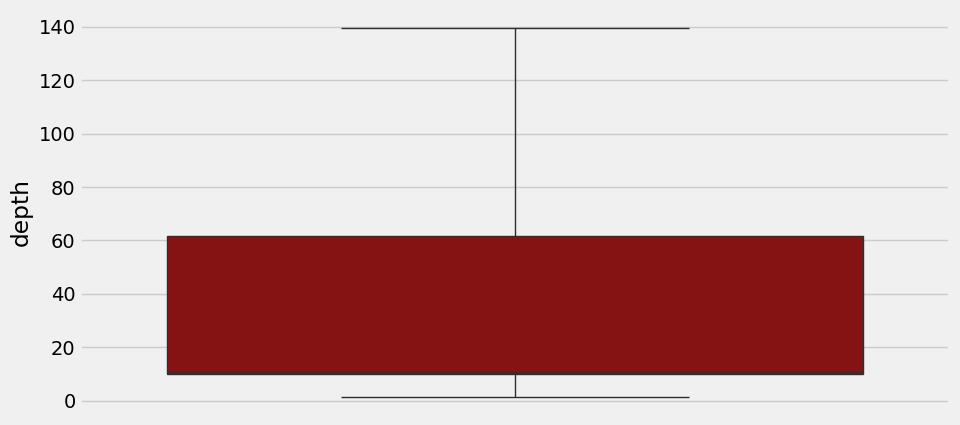

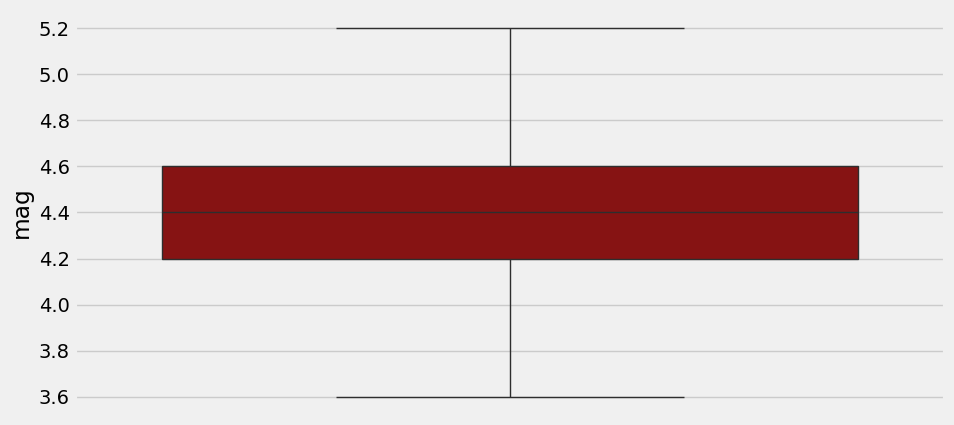

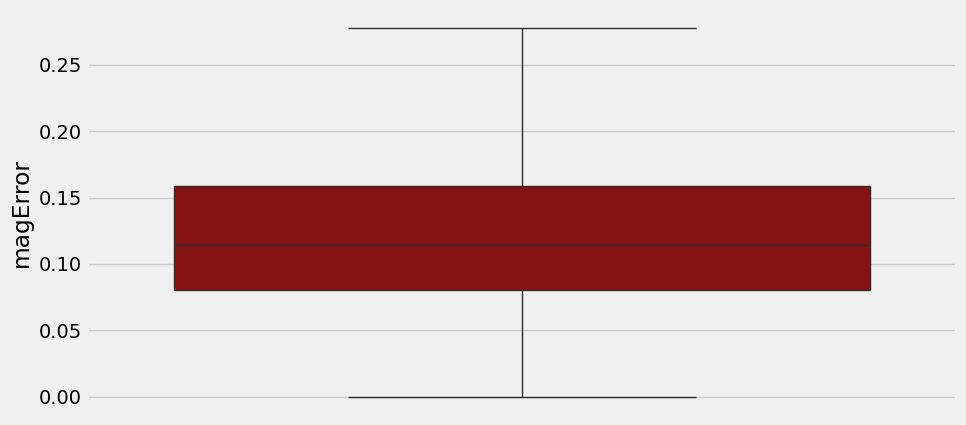

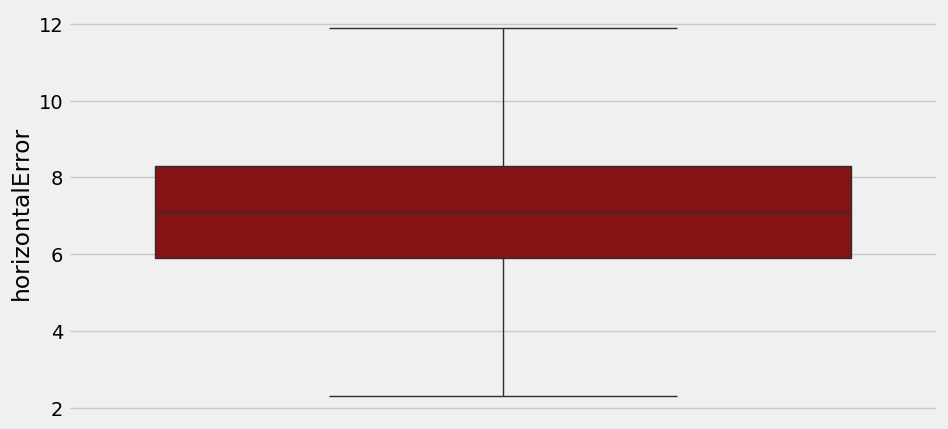

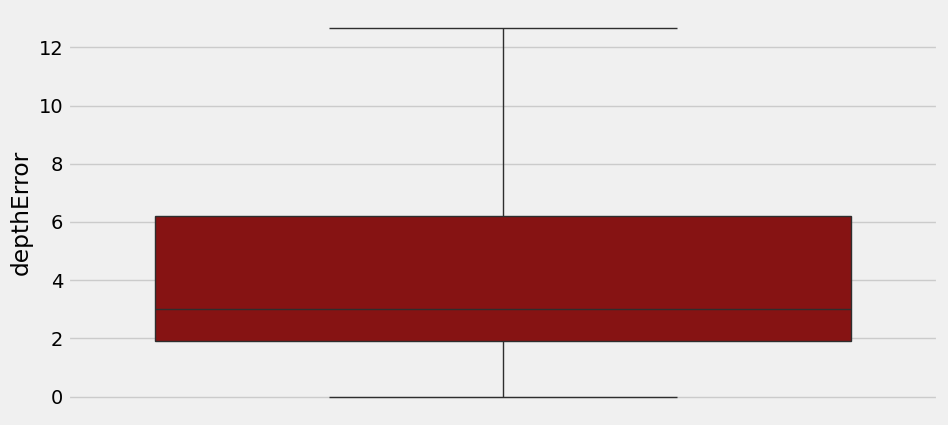

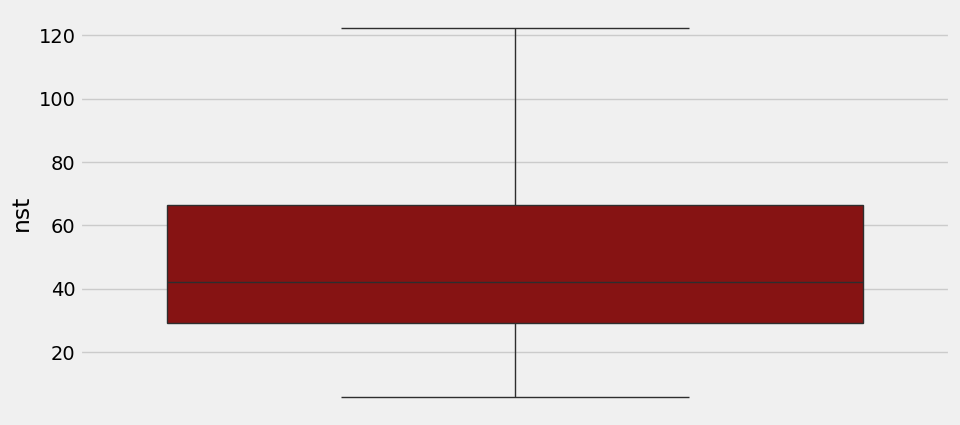

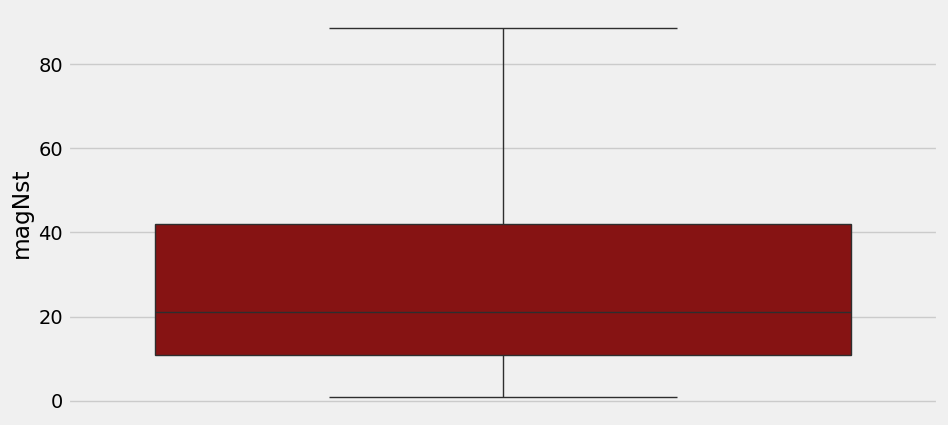

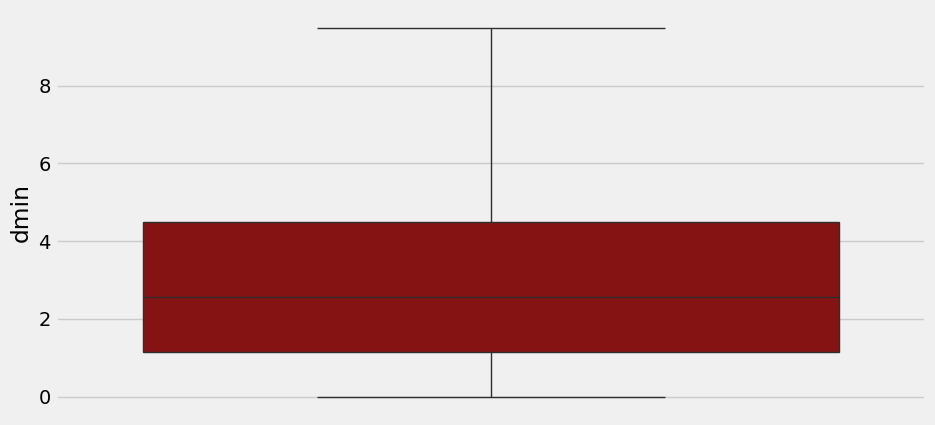

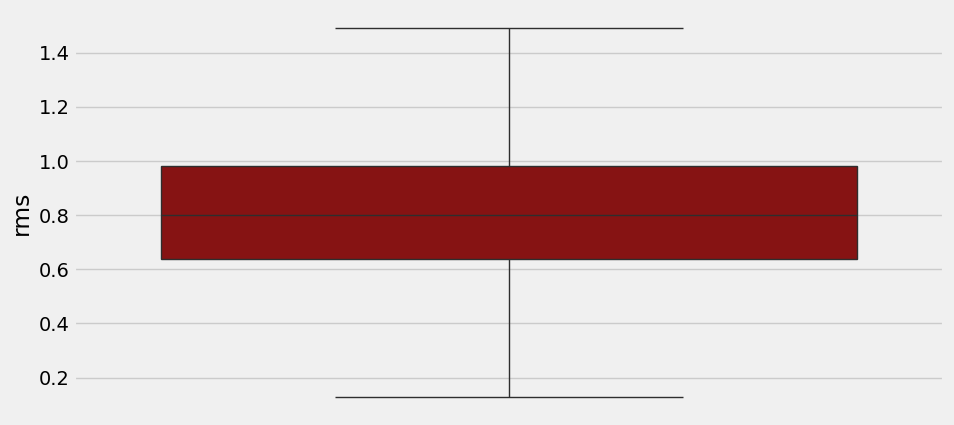

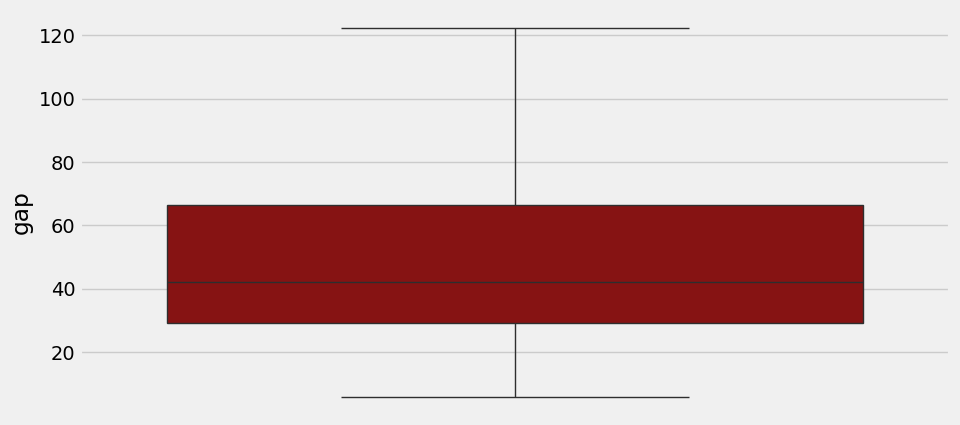

In [ ]:
for i in features:
  plt.figure(figsize=(10,5))
  sns.boxplot(data[i],color='#990000')
  plt.ylabel = i


# **Encoding**


We need to encode categorical columns.But we need to clean since we analysed that there could data entry errors for two entries such as mb and mblg

In [ ]:
data['magType'].value_counts()

magType
mb       9183
mww       395
mwr        91
mwb        43
ml         18
mblg        9
mwc         7
mw          1
Mb          1
mb_lg       1
Name: count, dtype: int64

Replacing magType Mb by mb

In [ ]:
data['magType']=data['magType'].replace('Mb','mb')

Replacing magType mb_lg by mblg

In [ ]:
data['magType']=data['magType'].replace('mb_lg','mblg')

# **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
data['magType'] = lab.fit_transform(data['magType'])
data['place'] = lab.fit_transform(data['place'])
data

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,place,horizontalError,depthError,magError,magNst
0,44.8695,52.4433,10.388,4.5,0,49.0,49.0,3.6700,0.87,6894,8.310,5.457,0.0790,48.0
1,43.3327,83.7836,10.000,4.4,0,40.0,40.0,3.1360,1.05,4543,7.480,1.700,0.1040,27.0
2,36.4780,70.9118,120.173,4.0,0,29.0,29.0,2.4620,0.78,4492,6.090,8.250,0.1730,9.0
3,37.4855,70.0997,9.686,4.4,0,39.0,39.0,1.4540,0.58,3921,6.870,6.011,0.1080,25.0
4,30.3602,70.9070,39.643,4.8,0,16.0,16.0,4.4560,0.56,910,11.900,10.959,0.1090,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9744,32.8010,51.8110,8.000,4.3,0,52.0,52.0,4.0180,0.80,16,6.140,4.480,0.0992,31.0
9745,28.4720,51.5970,19.000,4.4,0,55.0,55.0,2.1344,0.80,7199,7.380,2.700,0.0972,42.0
9746,34.6500,73.1280,25.500,4.4,0,42.0,42.0,4.9986,1.01,25,8.088,5.300,0.0972,13.0
9747,36.5830,70.8020,139.450,4.1,0,17.0,17.0,1.0846,0.54,3373,6.800,12.650,0.1798,1.0


**Visualising correlations using Heatmap**

**Checking for correlation between features**

<Axes: >

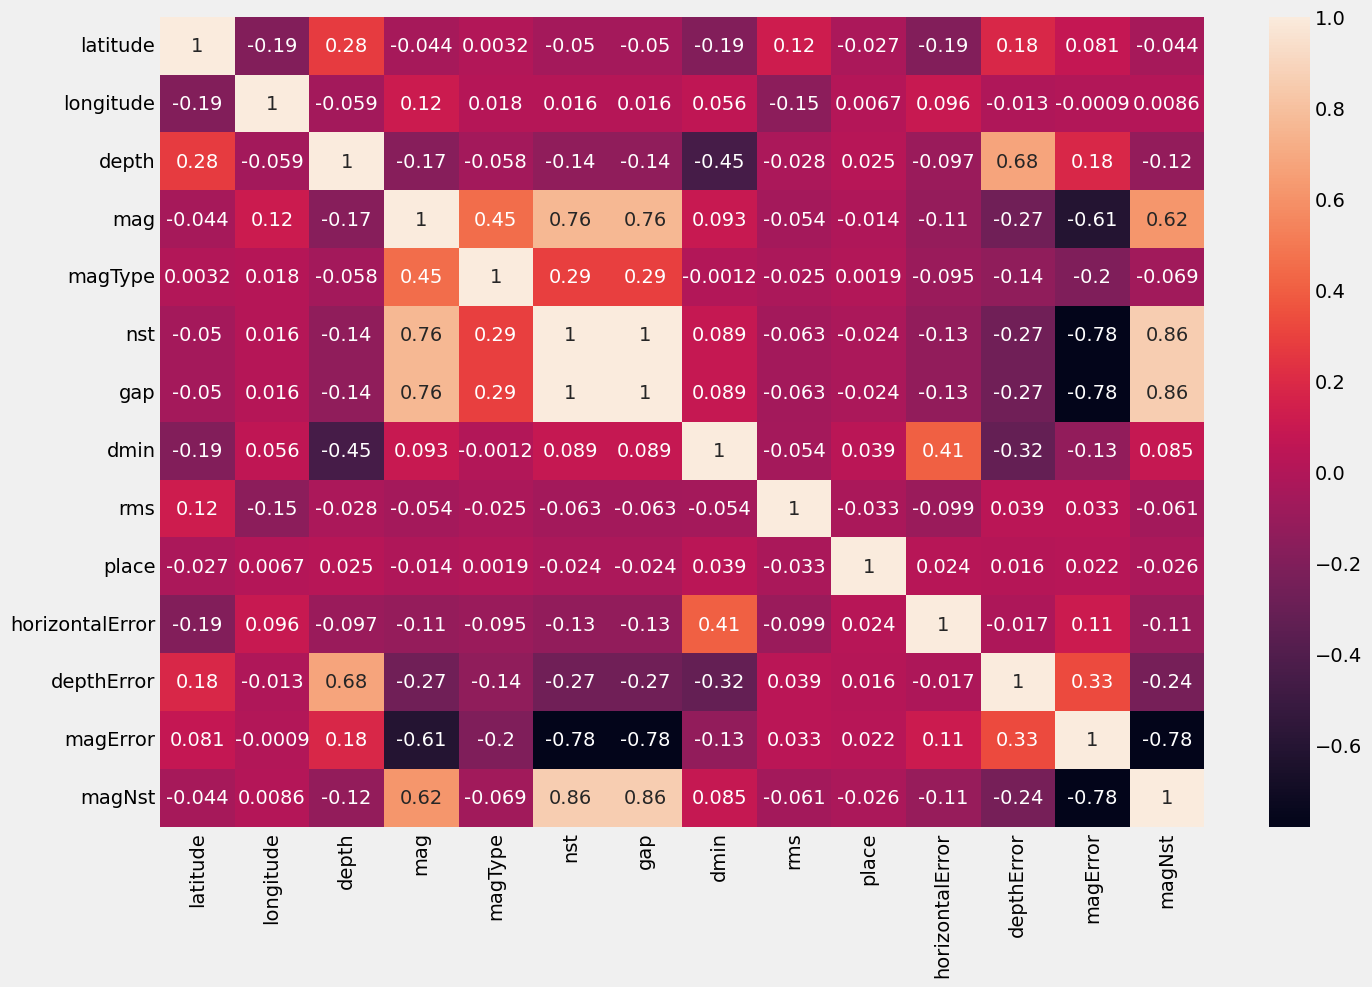

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

The variables 'nst' and 'gap' are highly correlated.Removing one of the columns will improve the model performance.So dropping the 'gap' column.

In [ ]:
data.drop(['gap'],axis=1,inplace=True)

**Separating input and output features**

In [ ]:
x=data.drop(['mag'],axis=1)
x

,latitude,longitude,depth,magType,nst,dmin,rms,place,horizontalError,depthError,magError,magNst
0,44.8695,52.4433,10.388,0,49.0,3.6700,0.87,6894,8.310,5.457,0.0790,48.0
1,43.3327,83.7836,10.000,0,40.0,3.1360,1.05,4543,7.480,1.700,0.1040,27.0
2,36.4780,70.9118,120.173,0,29.0,2.4620,0.78,4492,6.090,8.250,0.1730,9.0
3,37.4855,70.0997,9.686,0,39.0,1.4540,0.58,3921,6.870,6.011,0.1080,25.0
4,30.3602,70.9070,39.643,0,16.0,4.4560,0.56,910,11.900,10.959,0.1090,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9744,32.8010,51.8110,8.000,0,52.0,4.0180,0.80,16,6.140,4.480,0.0992,31.0
9745,28.4720,51.5970,19.000,0,55.0,2.1344,0.80,7199,7.380,2.700,0.0972,42.0
9746,34.6500,73.1280,25.500,0,42.0,4.9986,1.01,25,8.088,5.300,0.0972,13.0
9747,36.5830,70.8020,139.450,0,17.0,1.0846,0.54,3373,6.800,12.650,0.1798,1.0


In [ ]:
y=data['mag']
y

0       4.5
1       4.4
2       4.0
3       4.4
4       4.8
       ... 
9744    4.3
9745    4.4
9746    4.4
9747    4.1
9748    4.2
Name: mag, Length: 9749, dtype: float64

**Splitting the train and test data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,latitude,longitude,depth,magType,nst,dmin,rms,place,horizontalError,depthError,magError,magNst
2905,25.0038,64.3475,10.000,0,105.4,7.389,0.72,3983,8.60,1.900,0.048,88.5
530,36.3288,72.6568,58.337,0,23.0,1.851,0.70,6576,4.47,8.587,0.240,5.0
3290,23.6610,96.0256,10.000,0,57.6,1.676,0.61,7297,7.30,1.900,0.096,32.0
996,27.1228,54.4698,10.000,0,50.0,2.671,0.53,6286,7.70,1.900,0.092,33.0
3905,28.5746,51.6069,10.000,0,84.4,5.472,0.51,6934,7.40,1.900,0.056,88.5
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,42.1493,81.3249,33.330,0,36.4,2.659,0.72,1045,9.00,6.100,0.117,21.0
5191,26.1068,62.6982,42.330,0,42.2,5.979,1.29,3900,4.90,7.700,0.106,25.0
5390,36.0444,65.3865,27.150,0,20.8,2.667,0.49,6310,7.00,6.300,0.199,7.0
860,26.7150,54.2223,10.000,0,30.0,2.509,1.11,2740,9.30,1.900,0.129,16.0


In [ ]:
x_test

,latitude,longitude,depth,magType,nst,dmin,rms,place,horizontalError,depthError,magError,magNst
4534,27.1508,87.8133,52.91,0,90.0,3.870,0.54,3115,8.700,7.5,0.0570,88.0
2516,39.4875,54.8654,10.00,0,37.8,7.796,0.70,4101,8.500,2.0,0.1090,23.0
1606,30.8962,51.2407,10.00,0,61.2,3.629,0.56,4334,7.100,1.9,0.0930,33.0
9567,31.4140,86.5890,27.50,0,122.2,1.841,0.69,2830,7.228,3.9,0.0686,88.5
8630,19.6713,99.6740,10.00,0,25.6,1.096,0.62,3396,7.100,1.9,0.1790,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5830,40.9506,48.6465,44.92,0,102.0,3.081,0.94,2808,6.900,8.0,0.0640,72.0
6539,38.0233,72.4114,10.00,7,122.2,0.772,1.17,7295,5.000,1.8,0.0758,20.2
9265,28.1881,99.3815,10.00,0,30.0,4.283,0.67,5167,8.400,1.9,0.1590,13.2
4792,41.8891,82.5752,10.00,0,43.4,3.161,1.06,3797,8.300,1.9,0.1210,19.0


In [ ]:
y_train

2905    4.6
530     4.4
3290    4.6
996     4.2
3905    4.6
       ... 
5734    4.4
5191    4.3
5390    4.2
860     4.0
7270    4.3
Name: mag, Length: 6824, dtype: float64

In [ ]:
y_test

4534    4.4
2516    4.2
1606    4.3
9567    5.1
8630    4.4
       ... 
5830    4.5
6539    5.2
9265    4.2
4792    4.2
1971    5.2
Name: mag, Length: 2925, dtype: float64

# **Modeling**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
decision_tree = DecisionTreeRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)
linear = LinearRegression()
adaboost = AdaBoostRegressor(random_state=42)
xg_reg = xgb.XGBRegressor(objective='reg:squarederror',random_state=42)

models = {'random_forest': random_forest,'decision_tree': decision_tree,'gradient_boosting':gradient_boosting,'linear': linear,'adaboost':adaboost,'xg_reg':xg_reg}

In [ ]:
for name, model in models.items():
  print("model name is.....",name)
  model.fit(x_train,y_train)
  print("predicted value is.....")
  y_pred=model.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mape =mean_absolute_percentage_error(y_test,y_pred)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test,y_pred)

  print("Mean Absolute Error for", name, ":", mae)
  print("Mean Absolute Percentage Error for",name,":",mape)
  print("R2_score for", name, ":", r2)
  print("Mean Squared Error for",name,":",mse)
  print("----------------------------------------------")

model name is..... random_forest
predicted value is.....
Mean Absolute Error for random_forest : 0.10624478632478658
Mean Absolute Percentage Error for random_forest : 0.024224832502791813
R2_score for random_forest : 0.7879692490824004
Mean Squared Error for random_forest : 0.020955448205128218
----------------------------------------------
model name is..... decision_tree
predicted value is.....
Mean Absolute Error for decision_tree : 0.13760683760683773
Mean Absolute Percentage Error for decision_tree : 0.031383874657890505
R2_score for decision_tree : 0.5817477865300273
Mean Squared Error for decision_tree : 0.04133675213675213
----------------------------------------------
model name is..... gradient_boosting
predicted value is.....
Mean Absolute Error for gradient_boosting : 0.12409631991980548
Mean Absolute Percentage Error for gradient_boosting : 0.02834170178865625
R2_score for gradient_boosting : 0.7422388648858179
Mean Squared Error for gradient_boosting : 0.0254750789345619

# **Model selection and Model Training**

**Define hyperparameters for each model**

In [ ]:
from sklearn.model_selection import GridSearchCV
models = {"Linear Regression": LinearRegression(),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "AdaBoost": AdaBoostRegressor(),
          "Gradient Boosting": GradientBoostingRegressor(),
          "XGBoost": xgb.XGBRegressor()}
parameters = {
          "Linear Regression": {},
          "Decision Tree": {'max_depth': [3, 5, 7, 10, 15],
                            'min_samples_split': [2, 5, 10],
                            'min_samples_leaf': [1, 2, 4]},
          "Random Forest": {'n_estimators': [50, 100],
                            'max_depth': [3, 5, 7, 10],
                            'min_samples_split': [2, 5, 10],
                            'min_samples_leaf': [1, 2, 4]},
          "Gradient Boosting": {'n_estimators': [50, 100],
                                'learning_rate': [0.01, 0.1, 1],
                                'max_depth': [3, 5, 7]},
          "AdaBoost": {'n_estimators': [50, 100],
                      'learning_rate': [0.01, 0.1, 1]},
          "XGBoost": {'n_estimators': [50, 100],
                      'learning_rate': [0.01, 0.1, 1],
                      'max_depth': [3, 5, 7]}
}

# **Model Tuning and Model Evaluation**

In [ ]:
best_params = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(model, parameters[model_name], cv=5, scoring='r2')
    grid_search.fit(x_train, y_train)
    best_params[model_name] = grid_search.best_params_
    print(f"Best Parameters for {model_name}: {best_params[model_name]}")

# Output the best parameters
print("Best Parameters for all models:")
for model_name in best_params:
    print(f"{model_name}: {best_params[model_name]}")

Tuning hyperparameters for Linear Regression...
Best Parameters for Linear Regression: {}
Tuning hyperparameters for Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5}
Tuning hyperparameters for Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Tuning hyperparameters for AdaBoost...
Best Parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}
Tuning hyperparameters for Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Tuning hyperparameters for XGBoost...
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best Parameters for all models:
Linear Regression: {}
Decision Tree: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5}
Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100,random_state=42,max_depth= 10, min_samples_leaf= 2, min_samples_split= 5)
decision_tree = DecisionTreeRegressor(random_state=42,max_depth= 10, min_samples_leaf=2, min_samples_split= 5)
gradient_boosting = GradientBoostingRegressor(random_state=42,learning_rate= 0.1, max_depth= 7, n_estimators= 100)
linear = LinearRegression()
adaboost = AdaBoostRegressor(random_state=42,learning_rate=0.1, n_estimators=50)
xg_reg = xgb.XGBRegressor(objective='reg:squarederror',random_state=42)

models = {'random_forest': random_forest,'decision_tree': decision_tree,'gradient_boosting':gradient_boosting,'linear': linear,'adaboost':adaboost,'xg_reg':xg_reg}
r2_score_list = []


In [ ]:
for name, model in models.items():
  print("model name is.....",name)
  model.fit(x_train,y_train)
  print("predicted value is.....")
  y_pred=model.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mape =mean_absolute_percentage_error(y_test,y_pred)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test,y_pred)
  r2_score_list.append(r2)

  print("Mean Absolute Error for", name, ":", mae)
  print("Mean Absolute Percentage Error for",name,":",mape)
  print("R2_score for", name, ":", r2)
  print("Mean Squared Error for",name,":",mse)
  print("----------------------------------------------")

model name is..... random_forest
predicted value is.....
Mean Absolute Error for random_forest : 0.12010468394489285
Mean Absolute Percentage Error for random_forest : 0.027481844433122668
R2_score for random_forest : 0.7511476559898522
Mean Squared Error for random_forest : 0.024594604240476454
----------------------------------------------
model name is..... decision_tree
predicted value is.....
Mean Absolute Error for decision_tree : 0.12916683283065059
Mean Absolute Percentage Error for decision_tree : 0.0295531185244269
R2_score for decision_tree : 0.6956263925727127
Mean Squared Error for decision_tree : 0.030081888300859276
----------------------------------------------
model name is..... gradient_boosting
predicted value is.....
Mean Absolute Error for gradient_boosting : 0.10000810810142205
Mean Absolute Percentage Error for gradient_boosting : 0.022717346618975485
R2_score for gradient_boosting : 0.8151094143347009
Mean Squared Error for gradient_boosting : 0.0182731281889894

In [ ]:
model=['RANDOM FOREST','DECISION TREE','GRADIENT BOOSTING','LINEAR REGRESSION','ADABOOST REGRESSOR','XGB REGRESSOR']
best_model = pd.DataFrame({"model": model, "R2 score": r2_score_list})
best_model2 = best_model.sort_values(by="R2 score",ascending=False)
best_model2



,model,R2 score
2,GRADIENT BOOSTING,0.815109
5,XGB REGRESSOR,0.811508
0,RANDOM FOREST,0.751148
1,DECISION TREE,0.695626
3,LINEAR REGRESSION,0.657309
4,ADABOOST REGRESSOR,0.652668


## **Comparative Analysis of Machine Learning Models Using R2 Score**

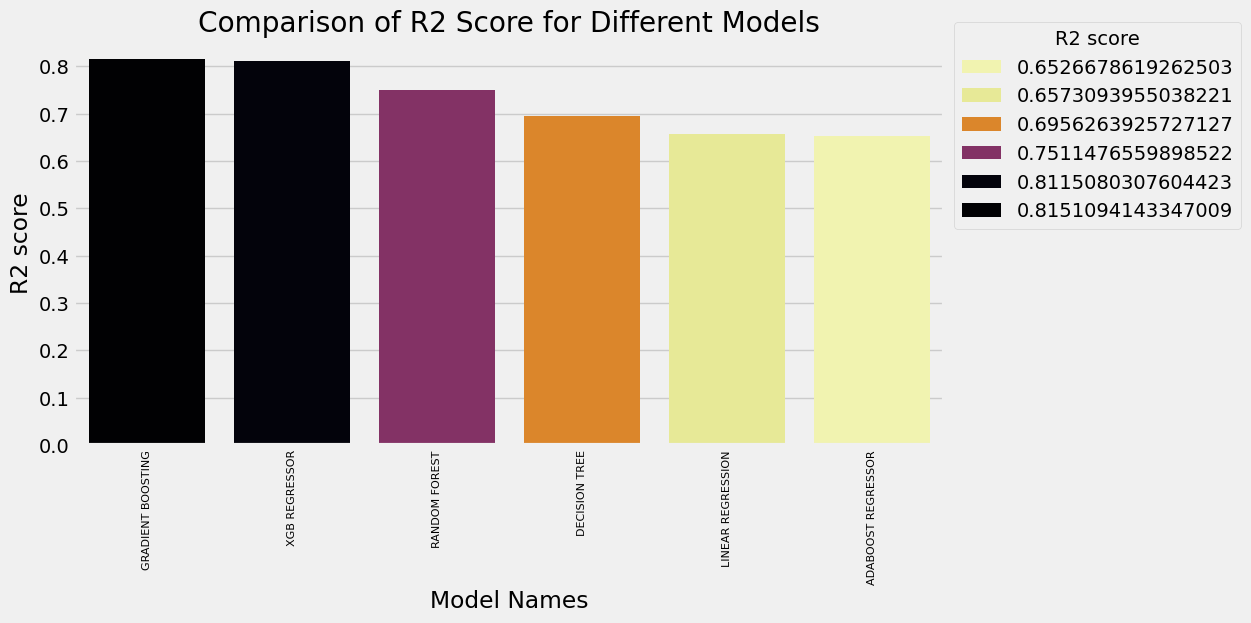

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90, fontsize=8)
sns.barplot(x=best_model2['model'], y=best_model2['R2 score'], hue=best_model2['R2 score'], data=best_model2,palette='inferno_r')
plt.xlabel("Model Names")
#plt.ylabel("Scores")
plt.title("Comparison of R2 Score for Different Models")
plt.legend(title='R2 score', bbox_to_anchor=(1, 0.51), loc='lower left')
plt.show()

**The evaluation of these machine learning models revealed Gradient Boosting as the top performer in terms of predictive accuracy, closely followed by XGB Regressor and Random Forest. These findings provide valuable guidance for selecting the most suitable model for deployment in real-world applications**